# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Dirk Rossmann** GmbH, commonly referred to as Rossmann, is one of the largest drug store chains in Europe with around **56,200 employees** and more than 4000** stores**. In 2019 Rossmann had more than €10 billion turnover in Germany, Poland, Hungary, the Czech Republic, Turkey, Albania, Kosovo and Spain.
The company was founded in **1972** by Dirk Rossmann with its headquarters in Burgwedel near Hanover in Germany. The Rossmann family owns 60% of the company. The Hong Kong-based A.S. Watson Group owns 40%, which was taken over from the Dutch Kruidvat in 2004.


The product range includes up to **21,700 items** and can vary depending on the size of the shop and the location. In addition to drugstore goods with a focus on skin, hair, body, baby and health, Rossmann also offers promotional items ("World of Ideas"), pet food, a photo service and a wide range of natural foods and wines. There is also a **perfume range with around 200 commercial brands**. Rossmann has **29 private brands with 4600 products (as of 2019)**. In 1997, the first own brands Babydream, Facelle, Sunozon and Winston were introduced. The best-known Rossmann brands are Isana (skin, hair and body care), Alterra (natural cosmetics), domol (cleaning and laundry detergents) alouette (paper tissues etc).

**Assortment:-** Product assortment, also known as merchandise mix, is the range and variety of products you offer to your customers. It defines the product types your customers ultimately know you for.

If you hold a product range that’s too wide, you risk diluting your image and ending up with stock that’s hard to sell. But if you only sell a narrow product range, potential customers might leave your store empty-handed because they couldn’t buy everything they needed at once—and go to your competitor instead.

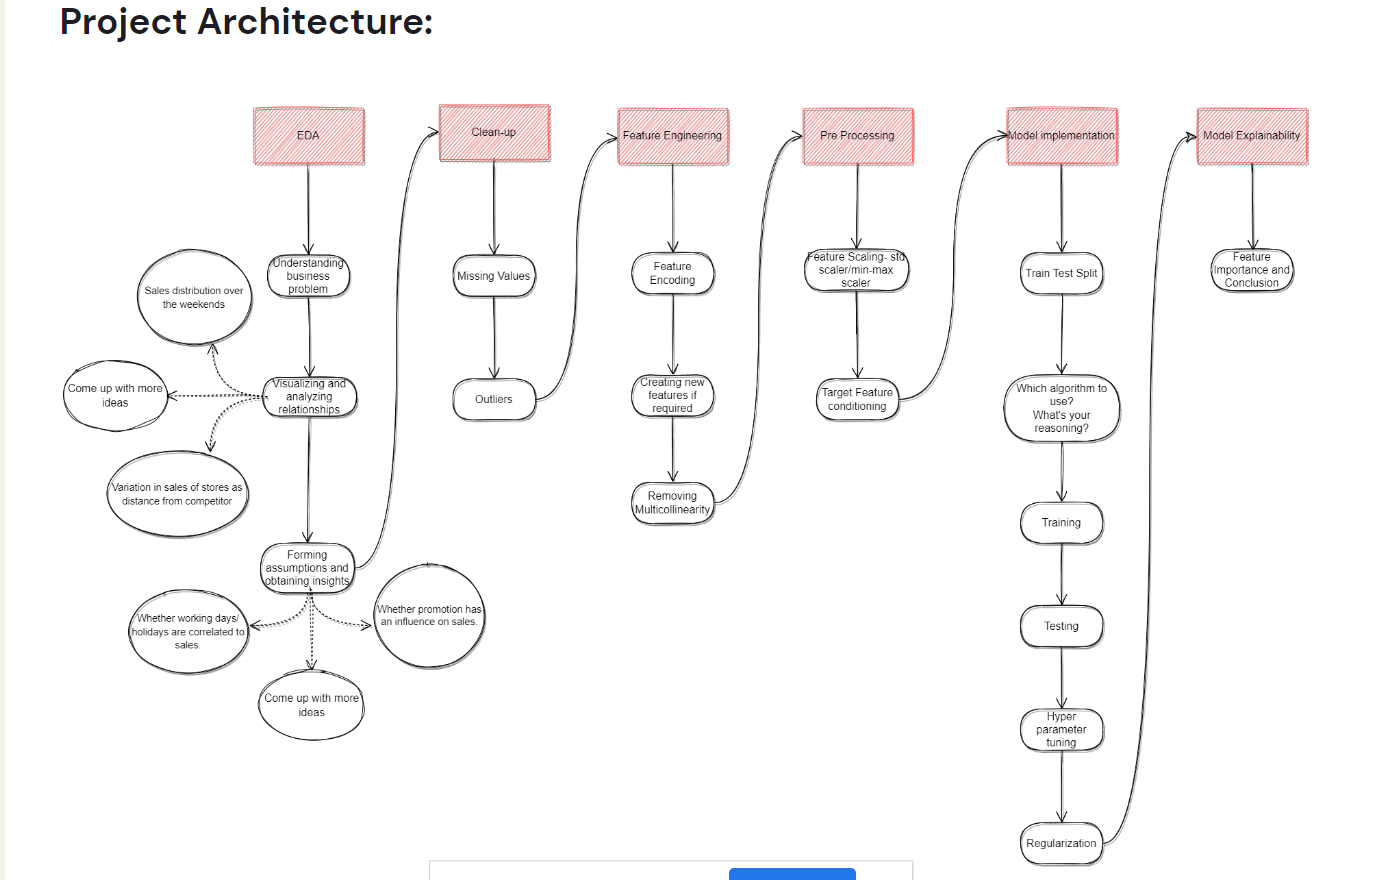

In [ ]:
# Importing Required Libraries

import pandas as pd # For Tabular Data Manipulation.
import matplotlib.pyplot as plt # For Basic Visualization
import seaborn as sns # For Interactive Visualization and it was made top of matplotlib itself.
import numpy as np # For numeric python
import warnings # For Ignoring Warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting Drive to Fetch data in Google Colab Environment.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading Dataset using read_csv method of Pandas module.

df_rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter/Retail Sales Prediction/Data _ Resources/Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/Almabetter/Retail Sales Prediction/Data _ Resources/store.csv')

# <center><u>**01. Exploratory Data Analysis**</u></center>



In [ ]:
# Displying Top 5 records of rossmann dataset 

df_rossmann.head() # Using head method of dataframe object.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Viewing Last five records of rossmann dataset.

df_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# Displying Top 5 records of store dataset 

df_store.head()# Using head method of dataframe object.

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Viewing Last five records of store dataset

df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Checking the shape of both datasets.

print("Shape of Rossmann dataset : ",df_rossmann.shape) # using shape attribute of dataframe object.
print("Shape of Store dataset : ",df_store.shape)

Shape of Rossmann dataset :  (1017209, 9)
Shape of Store dataset :  (1115, 10)


In [ ]:
# Merging both of them first one is Rossmann and Store dataset.

df = pd.merge(df_rossmann,df_store,on = "Store", how = "inner") # merging both datasets using inner join.

In [ ]:
# Displying top five records using head method of dataframe object.

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Displying last 5 records.

df.tail() # Using tail method.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Checking shape of merged dataset.

df.shape # using shape attribute of dataframe object.

(1017209, 18)

In [ ]:
# Checking Missing values with their respective Percentage.

miss = df.isnull().sum().sort_values(ascending = False) # Finding Total missing values.
per = df.isnull().mean().sort_values(ascending = False) # Finding percentage of missing values.
pd.concat([miss,per*100],keys = ['Missing_Values','Percentage'],axis =1) # Concatinating both of them using concat.

,Missing_Values,Percentage
PromoInterval,508031,49.943620
Promo2SinceYear,508031,49.943620
Promo2SinceWeek,508031,49.943620
CompetitionOpenSinceYear,323348,31.787764
CompetitionOpenSinceMonth,323348,31.787764
CompetitionDistance,2642,0.259730
DayOfWeek,0,0.000000
Promo2,0,0.000000
Assortment,0,0.000000
Store,0,0.000000


* <i>PromoInterval,Promo2SinceYear, and Promo2SinceWeek have almost half of values missing in them, which needs to be imputed. 
* CompetitionOpenSinceYear,and CompetitionOpenSinceMonth have almost 31% values missing, which also we need to impute.
* CompetitionDistance has very less almost 0.25% missing values.</i>

In [ ]:
# Finding unique value of Open feature using unique method.

df['Open'].unique() #  0 - closed, 1 - open 

array([1, 0])

In [ ]:
# Finding Frequency of both values.

df['Open'].value_counts() # using value_counts() methods.

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
# Finding Frequency of SchoolHoliday feature 

df['SchoolHoliday'].value_counts() # Using value_counts() method.

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [ ]:
# Displying the Features name.

df.columns # Using columns attribute of dataframe object.

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Finding the Number of feature in dataset.

print("No. of Features : ",len(df.columns)) # Using len function.

No. of Features :  18


In [ ]:
# Finding Information about the dataframe like column, non_null, and Datatype.

df.info() # Using info method of dataframe object.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

*<i> There are 1017209 records in Dataset.</i>

In [ ]:
# Coverting object type into datetime.

df['Date'] = pd.to_datetime(df['Date']) # Because Date in an object type in dataframe. now we are converting it into datetime formate.

In [ ]:
# Displying Top five records of dataset

df.head() # Using head method.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Describing Basic stats of numerical Features.

df.describe() # Using describe method.

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
# Storing Numeric features in numeric_cols variable.

numeric_cols = df.describe().columns 
print("Numerical Features are : \n",list(numeric_cols))

Numerical Features are : 
 ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [ ]:
# Displying Categorical Features using describe method.

df.describe(include ="O") # include = "O", it means object.

,StateHoliday,StoreType,Assortment,PromoInterval
count,1017209,1017209,1017209,509178
unique,5,4,3,3
top,0,a,a,"Jan,Apr,Jul,Oct"
freq,855087,551627,537445,293122


In [ ]:
# Checking Unique value of PromoInterval feature.

df['PromoInterval'].unique() # Using unique method.

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
# Checking Unique value of CompetitionOpenSinceMonth feature.

df['CompetitionOpenSinceMonth'].unique() # Using unique method.

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
# Checking Unique value of CompetitionOpenSinceYear feature.

df['CompetitionOpenSinceYear'].unique() # Using unique method.

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
# Checking Unique value of Promo2SinceWeek feature.

df['Promo2SinceWeek'].unique() # Using unique method.

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [ ]:
# Checking Unique value of Promo2SinceYear feature.

df['Promo2SinceYear'].unique() # Using unique method.

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [ ]:
# Checking Unique value of Promo2 feature.

df['Promo2'].unique() # Using unique method.

array([0, 1])

In [ ]:
# Checking Unique value of StateHoliday feature.

df['StateHoliday'].unique() # Where :- a = public holiday, b = Easter holiday, c = Christmas, 0 = None

array(['0', 'a', 'b', 'c', 0], dtype=object)

* <i>In StateHoliday first 0 is an object. but second one is numeric, for making same data type, we will convert it into object type only.</i>

In [ ]:
# Displying Top five records of dataset.
 
df.head() # Using head method of dataframe object.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Storing Catgorical Features in cat_cols variable, then displying them.

cat_cols = df.describe(include = "O").columns
print("Categorical Features are : \n\n",list(cat_cols)) # converting it into list using list object.

Categorical Features are : 

 ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']


In [ ]:
# Showing dataframe of all categorical features.

df[cat_cols]

,StateHoliday,StoreType,Assortment,PromoInterval
0,0,c,a,NaN
1,0,c,a,NaN
2,0,c,a,NaN
3,0,c,a,NaN
4,0,c,a,NaN
...,...,...,...,...
1017204,0,d,c,"Mar,Jun,Sept,Dec"
1017205,0,d,c,"Mar,Jun,Sept,Dec"
1017206,0,d,c,"Mar,Jun,Sept,Dec"
1017207,0,d,c,"Mar,Jun,Sept,Dec"


## <u>**1.1: Visualization and Analysing Relationship**</u>

In [ ]:
# Setting Figure size using rcParams.

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

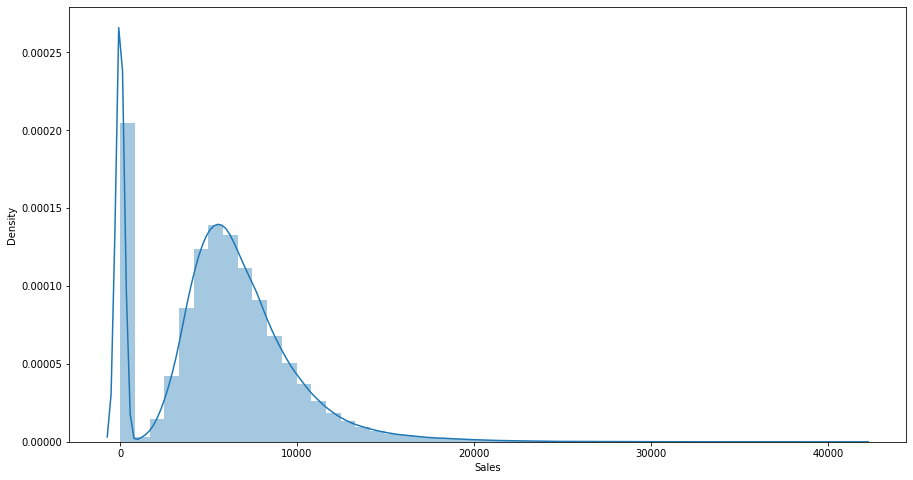

In [ ]:
# Distribution plot of Sales/Target column using distplot of seaborn.

sns.distplot(df['Sales']);

*<i> As we can see that the distribution of sales is right skewed.</i>

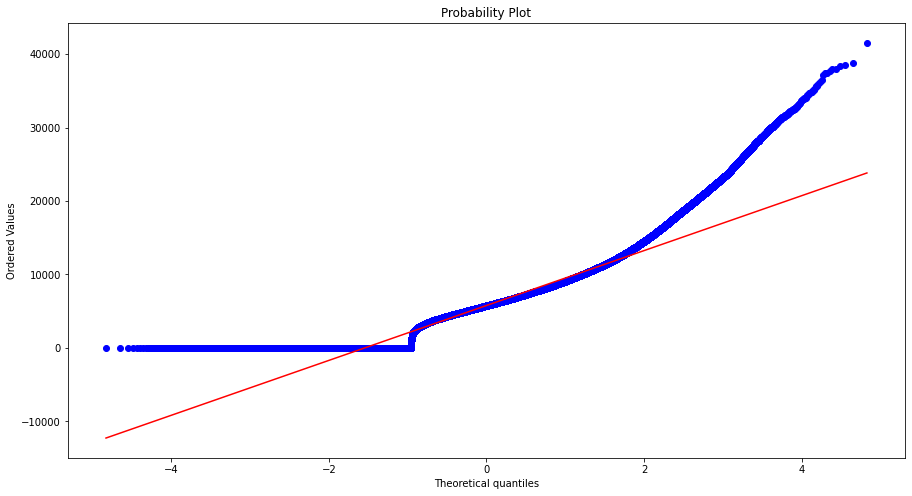

In [ ]:
# ploting the skewness of Sales using probplot.

import pylab 
import scipy.stats as stats
stats.probplot(df['Sales'], dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Finding skewness of feature using skew method of dataframe object.

df['Sales'].skew() # +ve - right skewed, -ve - left skewed, 0 - normal distribution.

0.6414596158103798

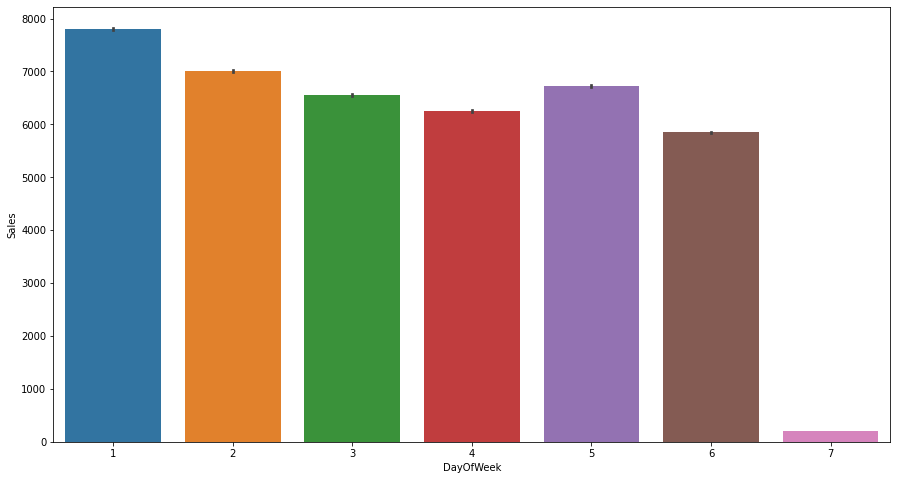

In [ ]:
# Barplot of DatyOfWeek with respect to Sales. 

sns.barplot(x =df['DayOfWeek'], y =df['Sales']); # using barplot of seaborn library.

* <i> Most of the store are closed on Sunday. therefore Sales on Sunday are very- very low.</i>

In [ ]:
# Displying columns name of dataset.

df.columns # Using columns attribute

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

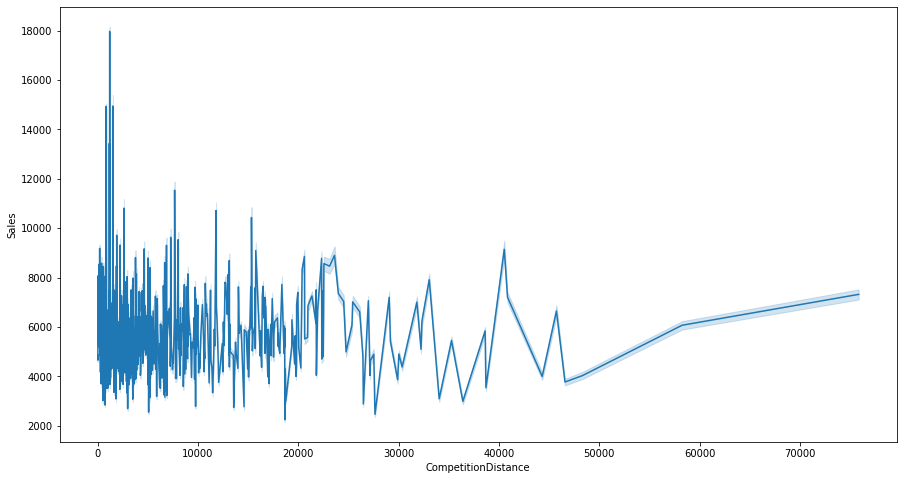

In [ ]:
# Relation between Sales and CompetitionDistance using lineplot of seaborn.

sns.lineplot(x = "CompetitionDistance",y = "Sales",data =df); 

* <i>Sales is high when CompetitionDistance is low.<i>

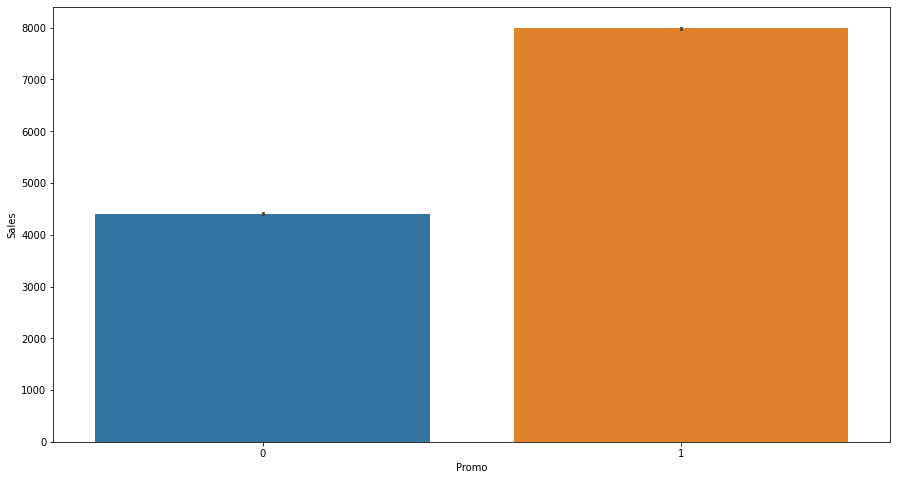

In [ ]:
# Barplot between Promo and sales.

sns.barplot(x = "Promo", y = "Sales", data =df); # 1 - promo is running, 0 - promo is not running.

* <i>Sales is high when Promo is running.</i>

#<u><center>**02. Cleaning UP**</center></u>

## <u>**2.1: Missing Values** </u>

In [ ]:
numeric_cols = list(numeric_cols)
print("Numerical Features are : \n\n",numeric_cols)

Numerical Features are : 

 ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [ ]:
numeric_cols.remove('Store') # removing Store column name from numeric_cols list.
numeric_cols.remove('Sales') # removing Sales column name from numeric_cols list.

In [ ]:
# Showing numeric_cols list after removing.

numeric_cols

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [ ]:
# 'CompetitionDistance','Customers' are continuous numerical columns and Assigning them into numeric_conts_cols variable.

numeric_conts_cols = ['CompetitionDistance','Customers']

In [ ]:
# Assigning All discrete variable in numeric_cols by removing continuous numerical columns.

for col in numeric_cols:
  if col in numeric_conts_cols:
    numeric_cols.remove(col)

In [ ]:
numeric_disc_cols = numeric_cols # Assigning numeric_cols into into  numeric_disc_cols
numeric_disc_cols

['DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [ ]:
# Displying Basic Stats of CompetitionDistance feature

df['CompetitionDistance'].describe() # Using describe method of df object.

count    1.014567e+06
mean     5.430086e+03
std      7.715324e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.890000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

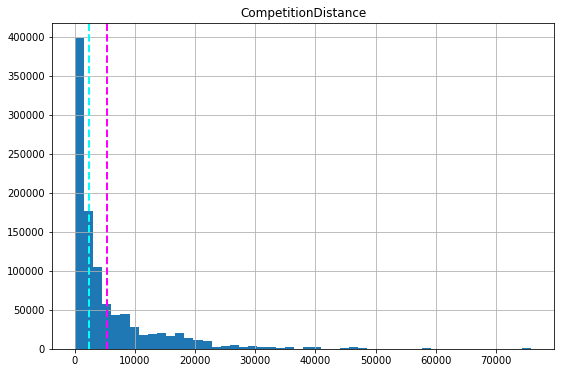

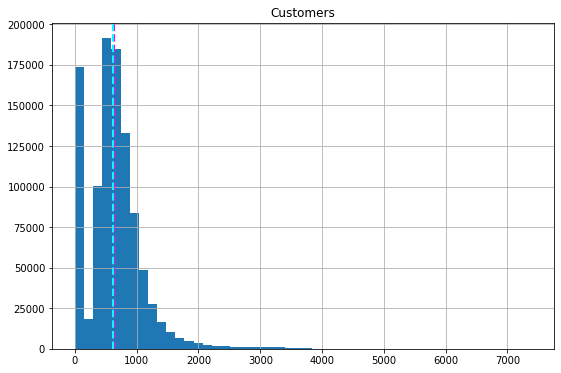

In [ ]:
# Visualization of numeric continuous features.

for col in numeric_conts_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() # it gives u the current location.
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
# Showing Numeric Discrete Features.

print("Contiuous Discrete features are : \n",numeric_disc_cols)

Contiuous Discrete features are : 
 ['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


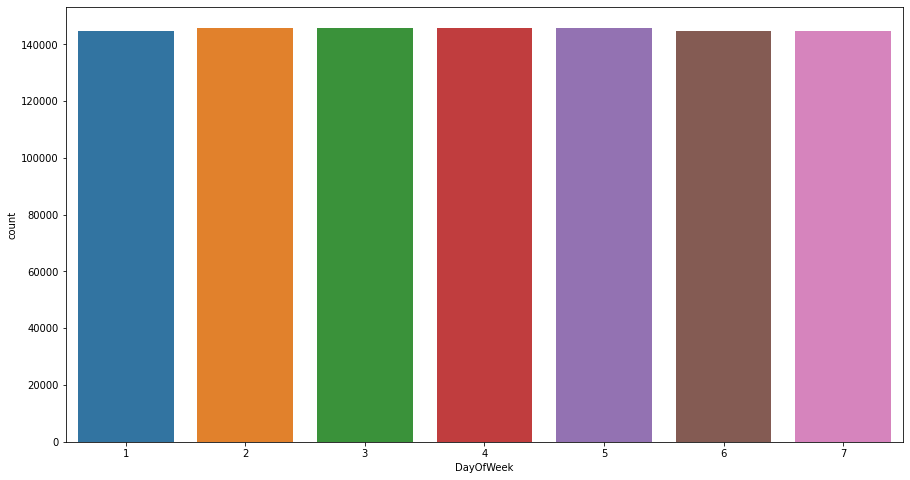

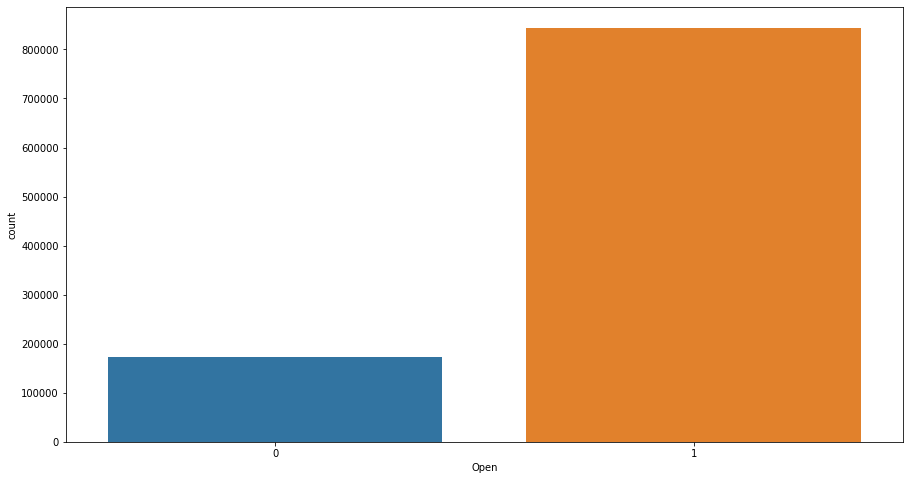

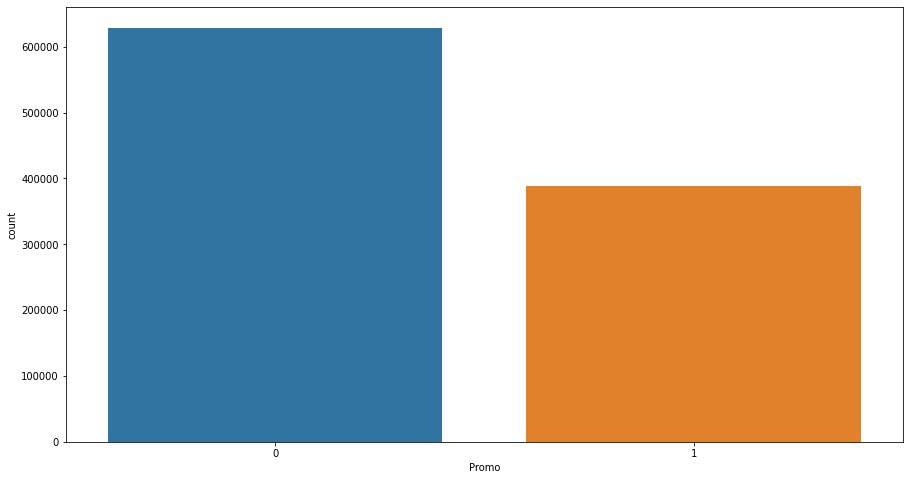

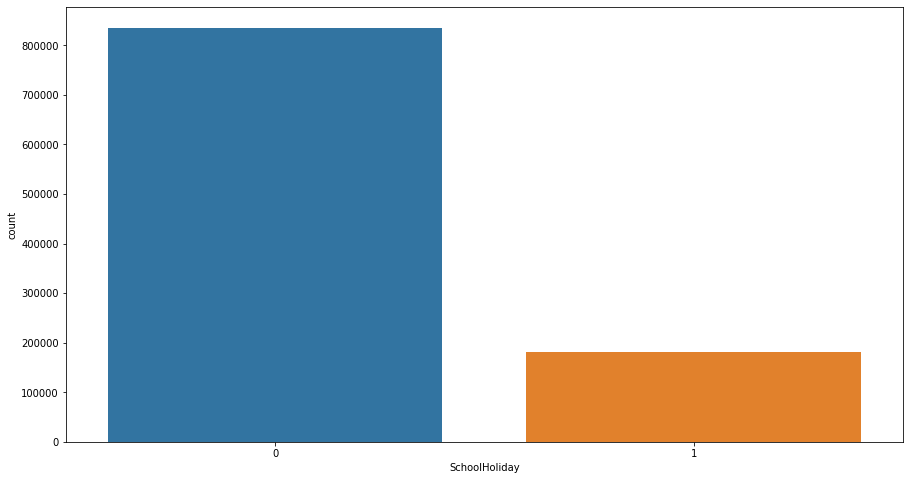

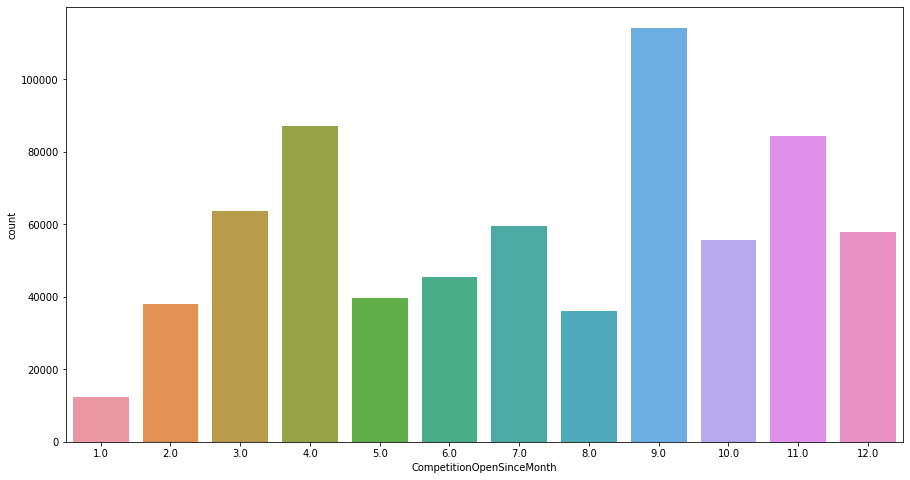

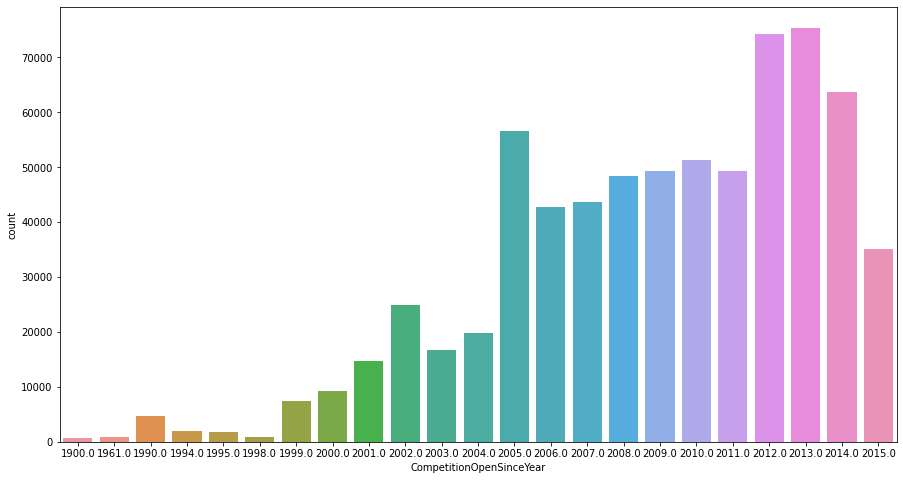

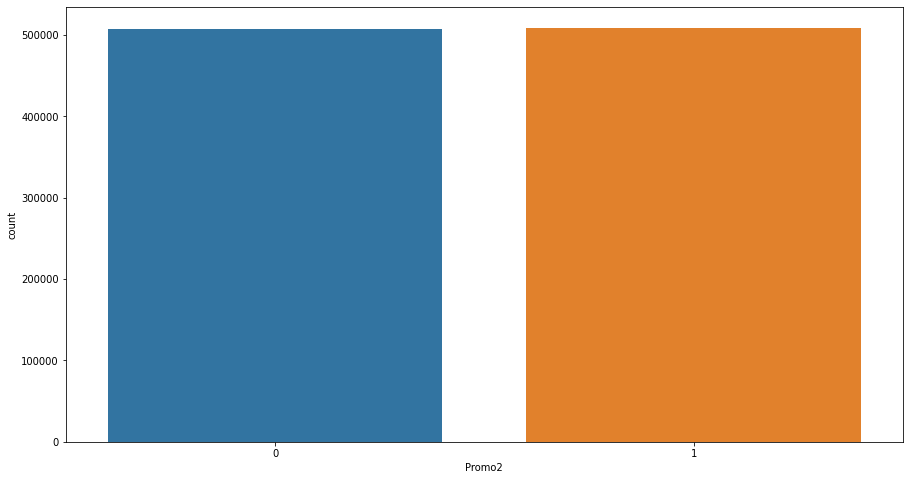

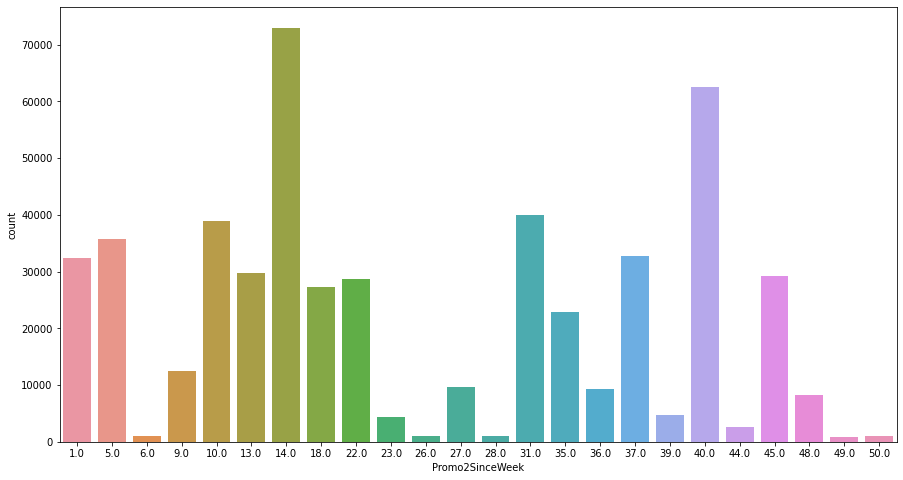

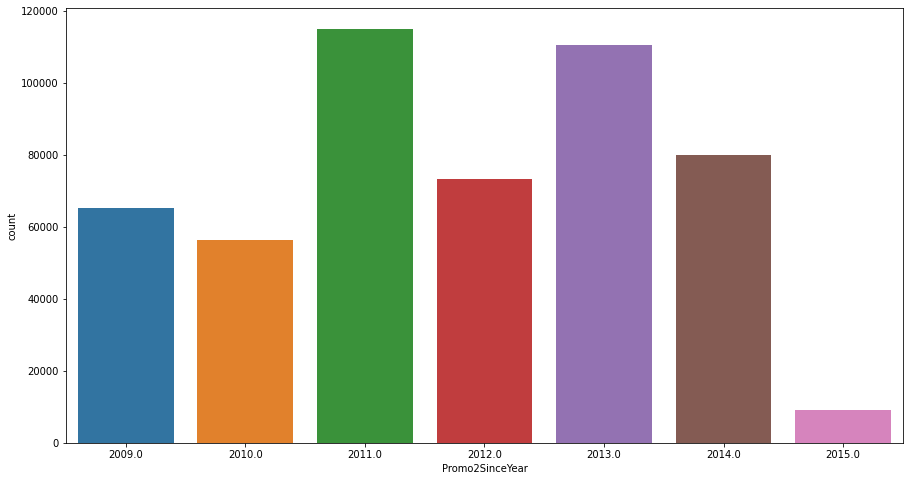

In [ ]:
# Visualization of Numeric Discrete features using countplot of seaborn.

for col in numeric_disc_cols:
  ax = plt.gca()
  sns.countplot(df[col],ax = ax)
  plt.show()

In [ ]:
numeric_conts_cols

['CompetitionDistance', 'Customers']

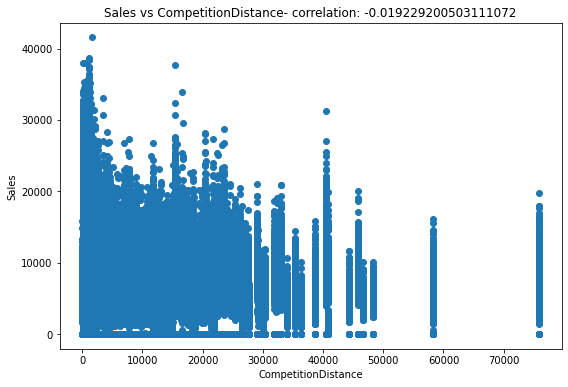

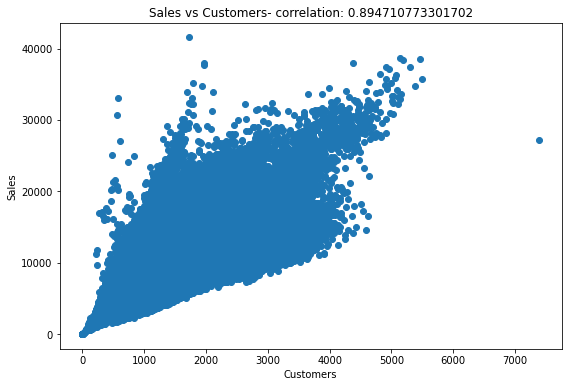

In [ ]:
# Ploting the scatterplot between Numeric continuous feature with respect to Target variable.

for col in numeric_conts_cols:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[col]
  label = df['Sales']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Sales')
  ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
  plt.show()

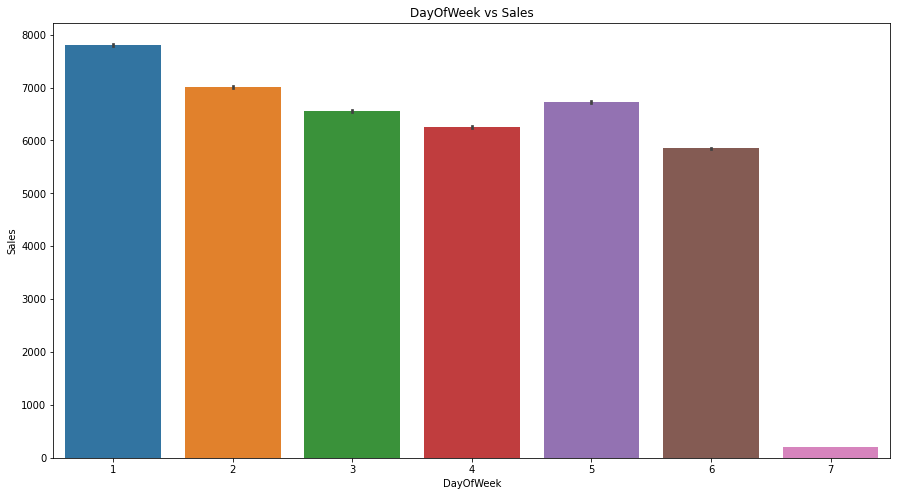

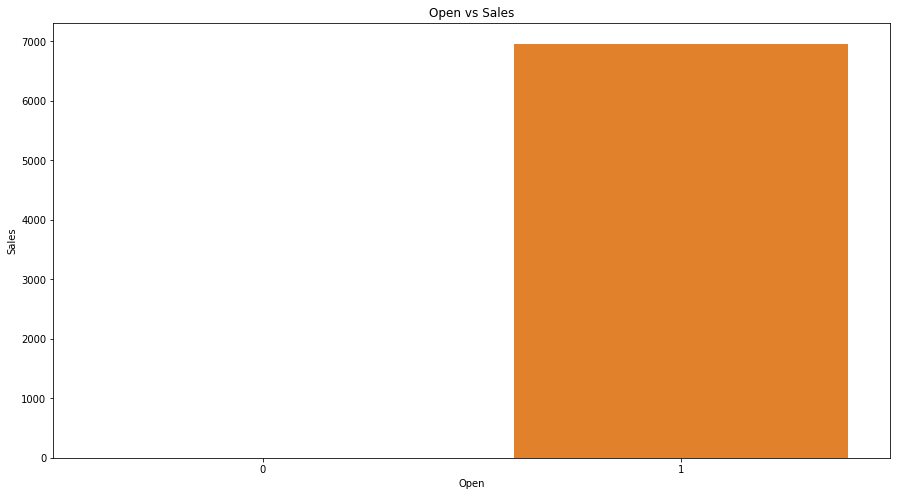

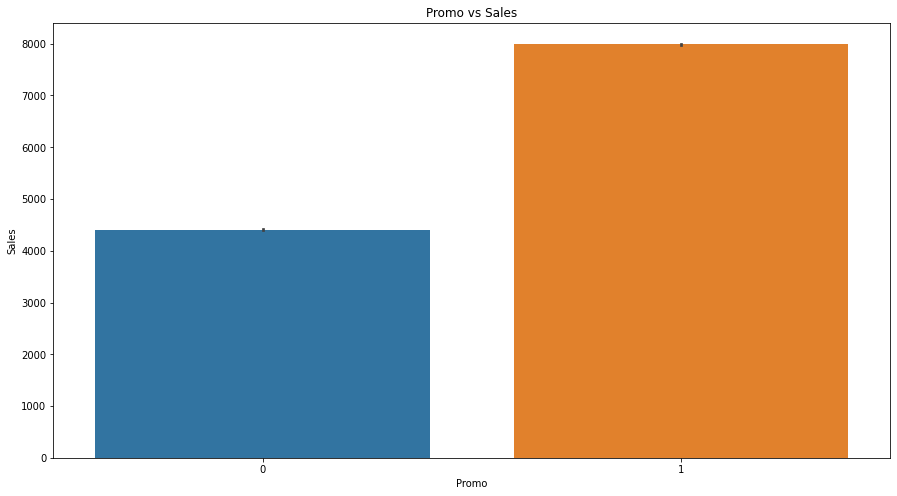

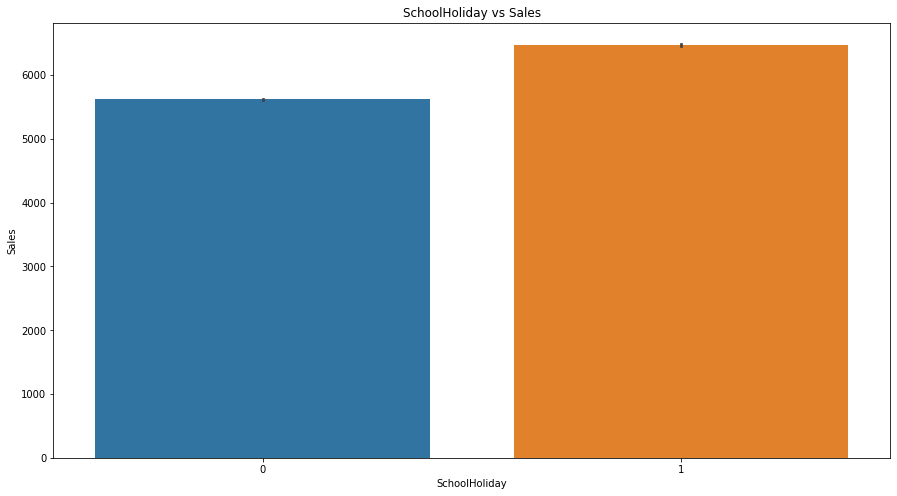

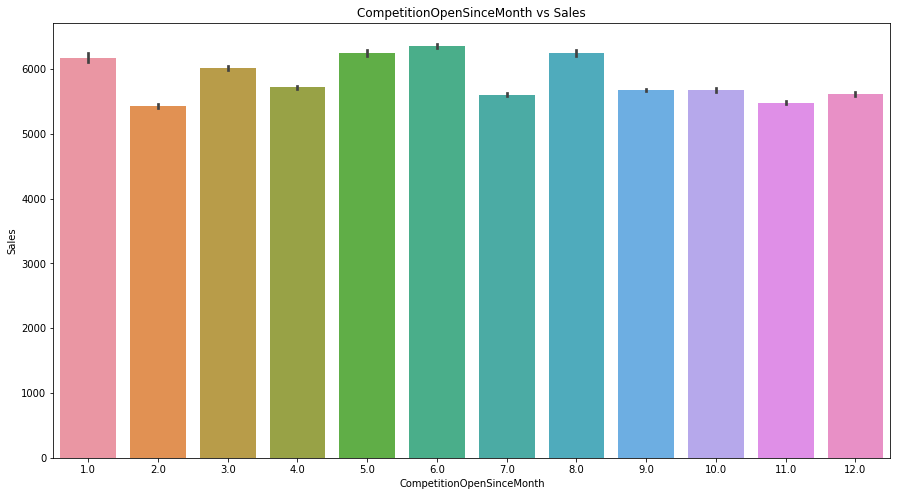

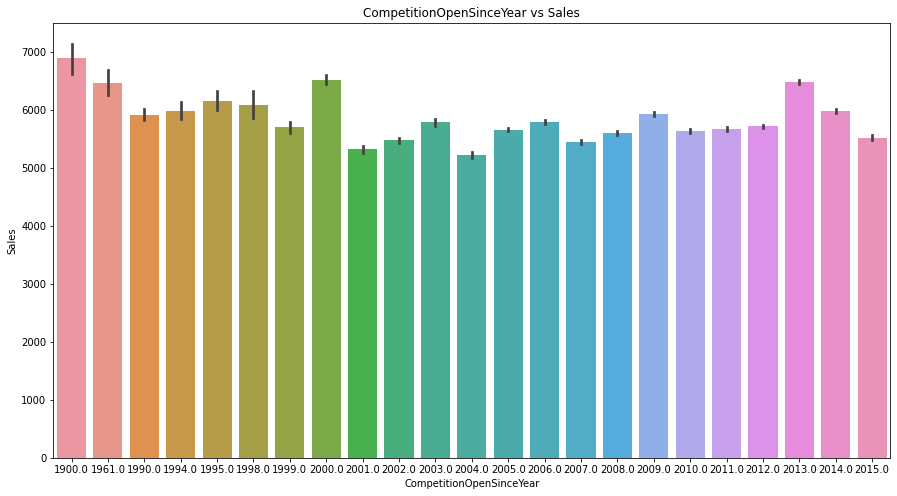

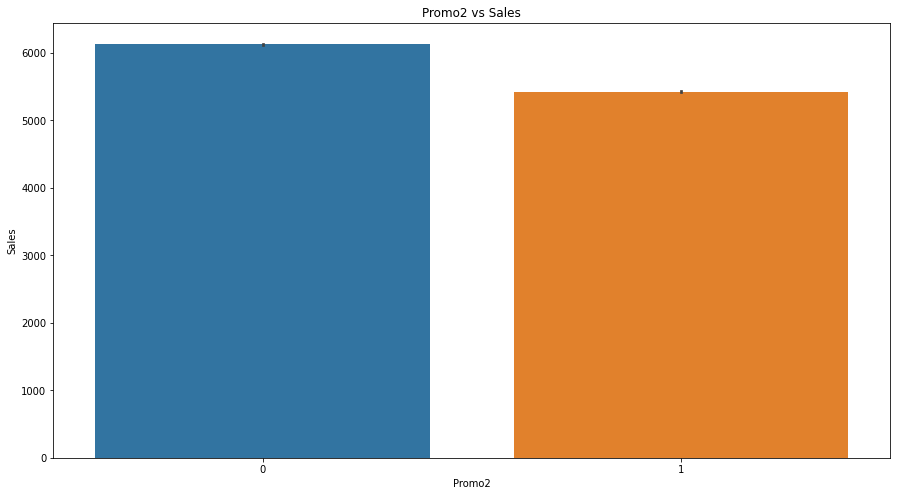

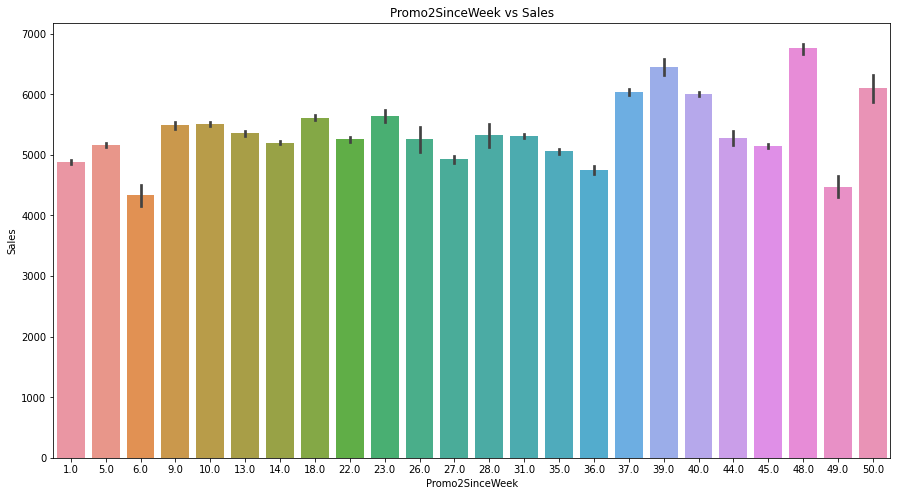

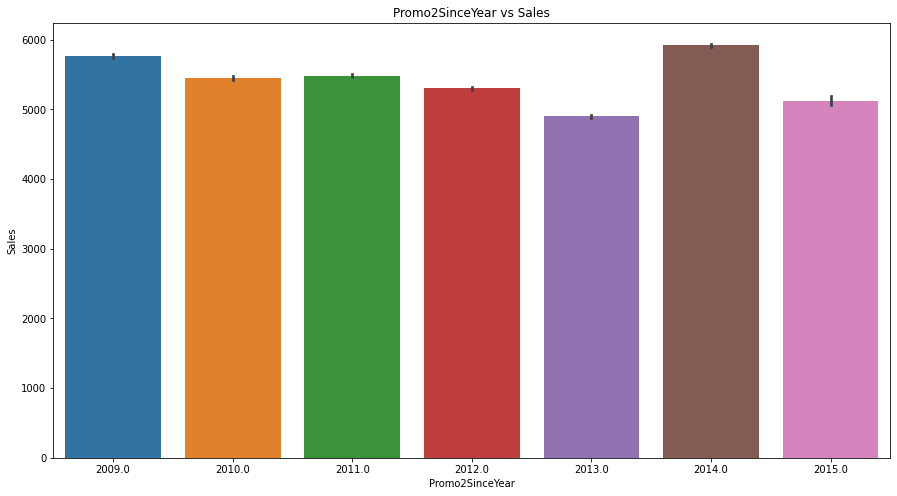

In [ ]:
# Displying Relation between Sales and Numeric Discrete columns.

for col in numeric_disc_cols:
  ax = plt.gca()
  sns.barplot(x =col,y="Sales",data  =df,ax = ax)
  plt.title(f"{col} vs Sales")
  plt.show()

* <i> When Store is closed then there is no Sales, which we can see in above graph.</i>
* <i>On Sunday, Mostly Stores are closed, So the sales is very less.</i>

In [ ]:
cat_cols = df.describe(include = "O").columns

In [ ]:
cat_cols

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [ ]:
def convert_str_(x):
  """
  Description : It takes a value and convert it into string.
  Function : convert_str_.
  Return type : string.
  Argument : a single value.
  Created by : Mujtaba Ali and Prateek
  """
  return str(x)

In [ ]:
df['StateHoliday'] = df['StateHoliday'].apply(convert_str_) # converting int 0 into object type.

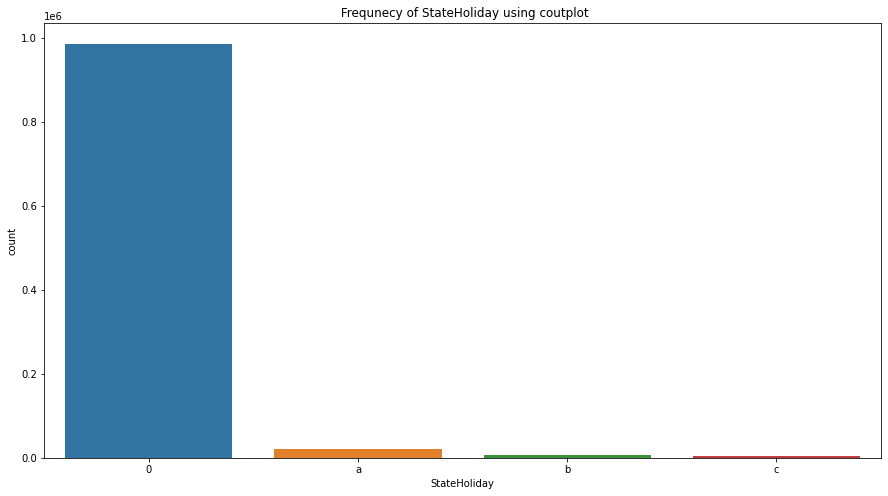

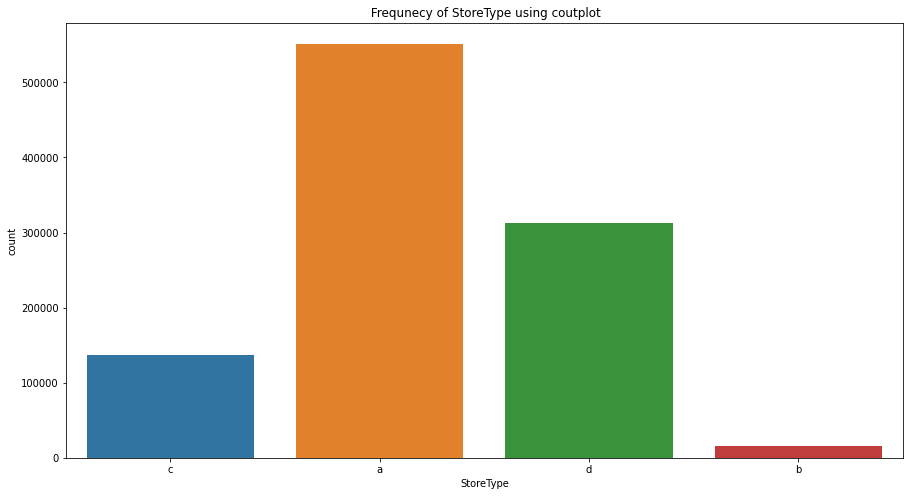

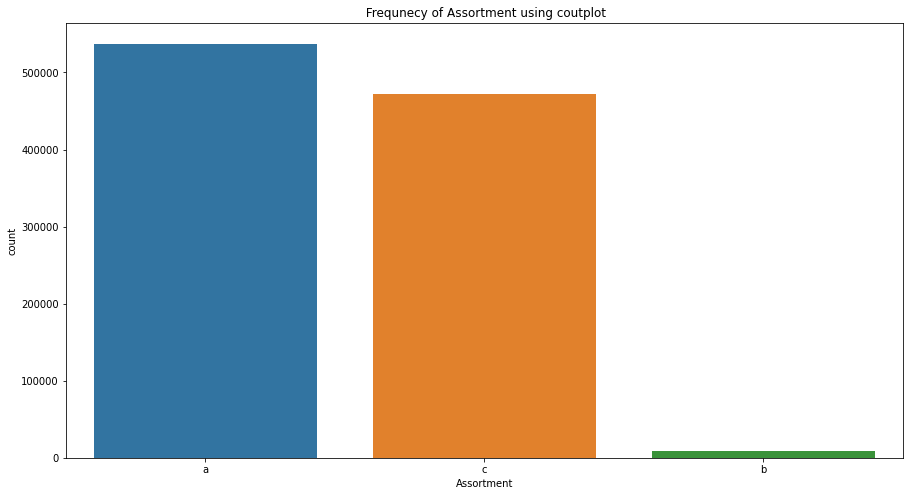

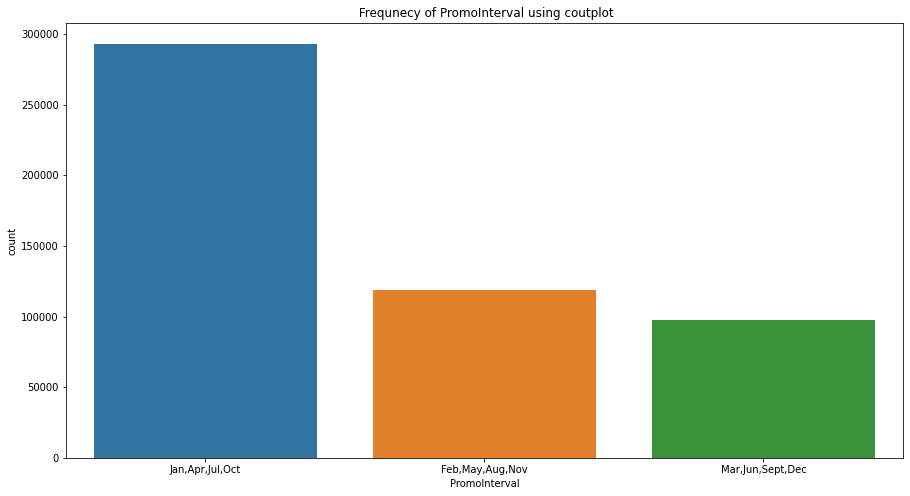

In [ ]:
# Counting Frequency using coutplot of all the categorical features.

for col in cat_cols:
  ax = plt.gca() # to get position of graph.
  sns.countplot(df[col])
  plt.title(f" Frequnecy of {col} using coutplot")
  plt.show()

In [ ]:
# Checking the missing values.

miss = df.isnull().sum().sort_values(ascending = False) # Finding missing values
per = df.isnull().mean().sort_values(ascending = False) # finding percentage of missing values.
pd.concat([miss,per*100,df.dtypes],keys = ['Missing_Values','Percentage','DataType'],axis =1) # concat then using concat method.

,Missing_Values,Percentage,DataType
PromoInterval,508031,49.943620,object
Promo2SinceYear,508031,49.943620,float64
Promo2SinceWeek,508031,49.943620,float64
CompetitionOpenSinceYear,323348,31.787764,float64
CompetitionOpenSinceMonth,323348,31.787764,float64
CompetitionDistance,2642,0.259730,float64
DayOfWeek,0,0.000000,int64
Promo2,0,0.000000,int64
Assortment,0,0.000000,object
Store,0,0.000000,int64


In [ ]:
# Finding mode of PromoInterval using mode method.

df['PromoInterval'].mode()[0] # index [0] means, we are taking only mode value.

'Jan,Apr,Jul,Oct'

In [ ]:
# Imputing Missing value by Mode of repective column.

df['PromoInterval'].fillna(df['PromoInterval'].mode()[0],inplace = True) # inplace means, we are changing in dataframe itself.
df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].mode()[0],inplace = True)
df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].mode()[0],inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0],inplace = True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0],inplace = True)

In [ ]:
# Finding median of CompetitionDistance feature.

print("Median is : ",df['CompetitionDistance'].median())

Median is :  2330.0


In [ ]:
# Imputing missing value with median of CompetitionDistance.

df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace = True)

In [ ]:
# Again Checking the Missing values after Imputation

miss = df.isnull().sum().sort_values(ascending = False) # finding missing value
per = df.isnull().mean().sort_values(ascending = False) # finding percentage of missing values
pd.concat([miss,per*100,df.dtypes],keys = ['Missing_Values','Percentage','DataType'],axis =1) # concat them using concat method

,Missing_Values,Percentage,DataType
Store,0,0.0,int64
DayOfWeek,0,0.0,int64
Promo2SinceYear,0,0.0,float64
Promo2SinceWeek,0,0.0,float64
Promo2,0,0.0,int64
CompetitionOpenSinceYear,0,0.0,float64
CompetitionOpenSinceMonth,0,0.0,float64
CompetitionDistance,0,0.0,float64
Assortment,0,0.0,object
StoreType,0,0.0,object


* <i>AS we can see that there is no missing value in our dataframe.</i>

## <u>**2.2: Outliers Detection**</u>

<i>We are not handling outliers here, We will just detect them for now. We will handle them later in feature engineering.</i>

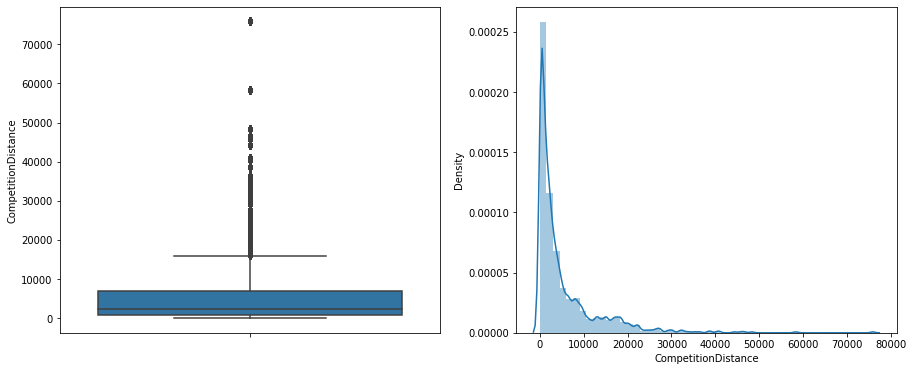

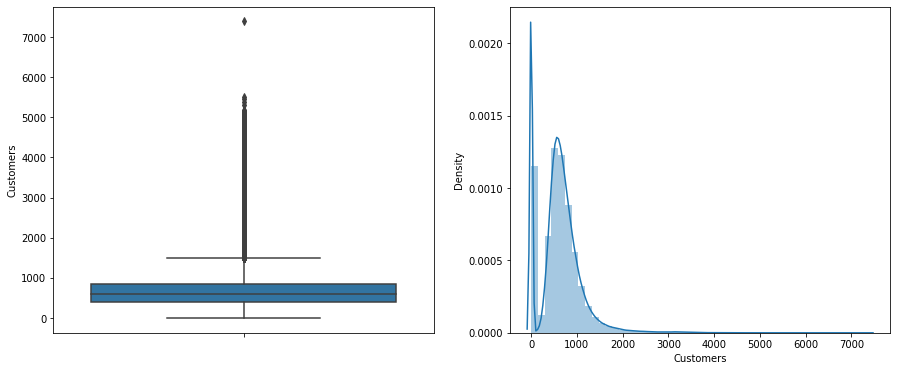

In [ ]:
# Checking Outliers in Continuous Numerical features.

for var in numeric_conts_cols:

  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=df[var])
  fig.set_title('')
  fig.set_ylabel(var)

  plt.subplot(1, 2, 2)
  fig = sns.distplot(df[var])
  fig.set_xlabel(var) 
  plt.show()
   

* <i>CompetitionDistance, and Customers have Outliers that need to be handled.</i>

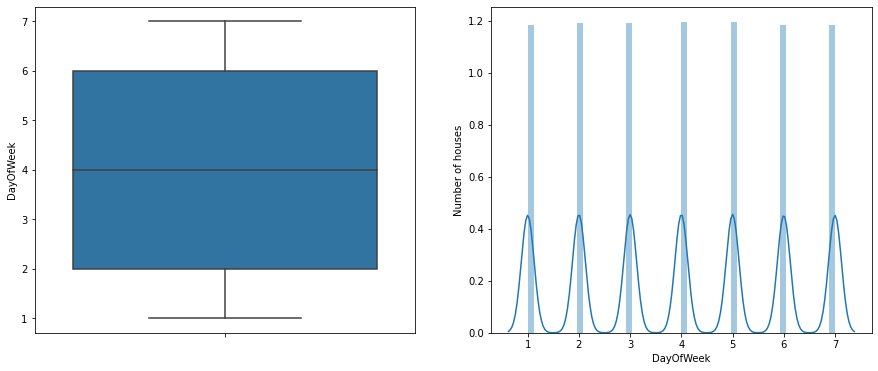

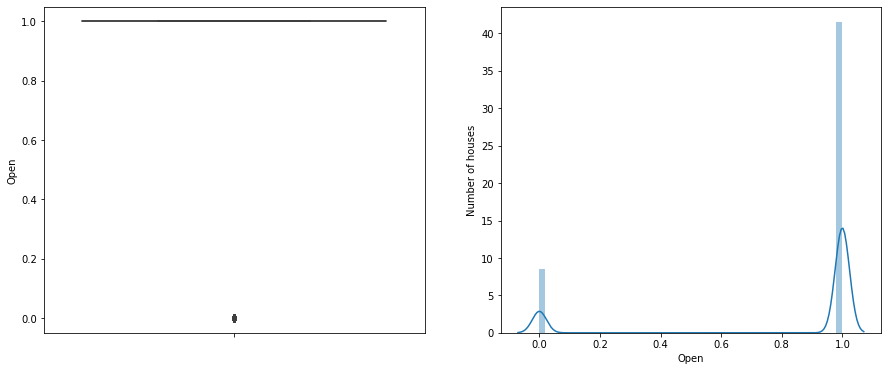

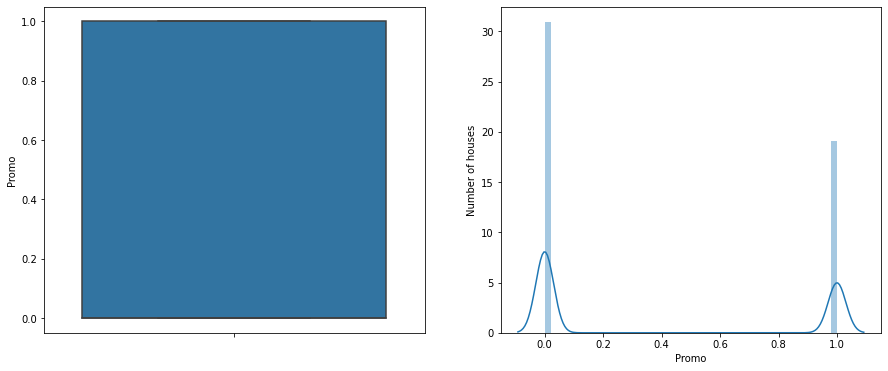

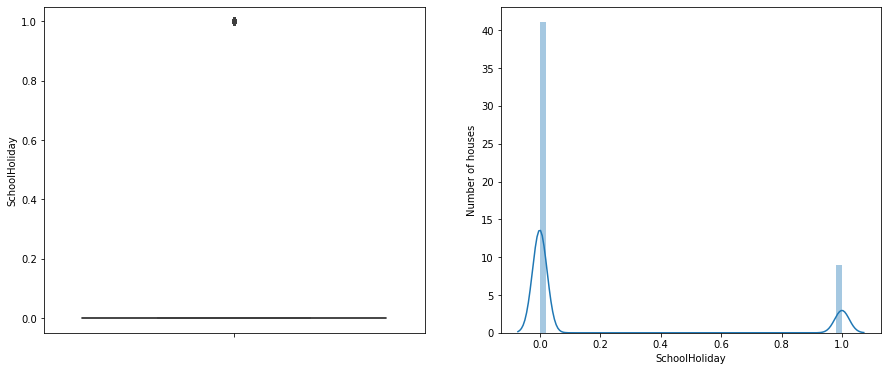

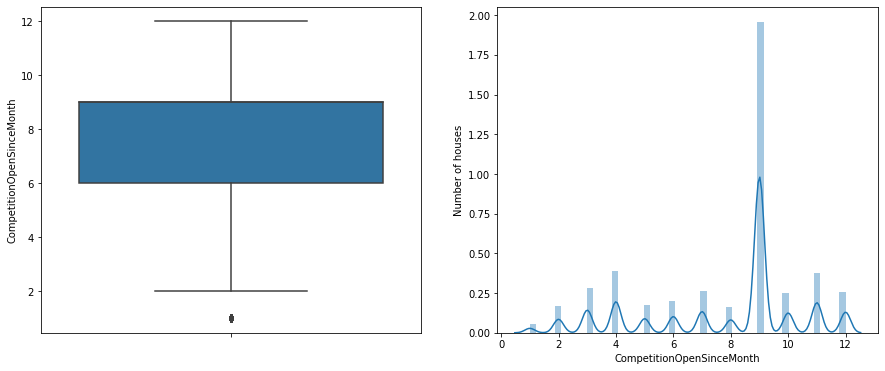

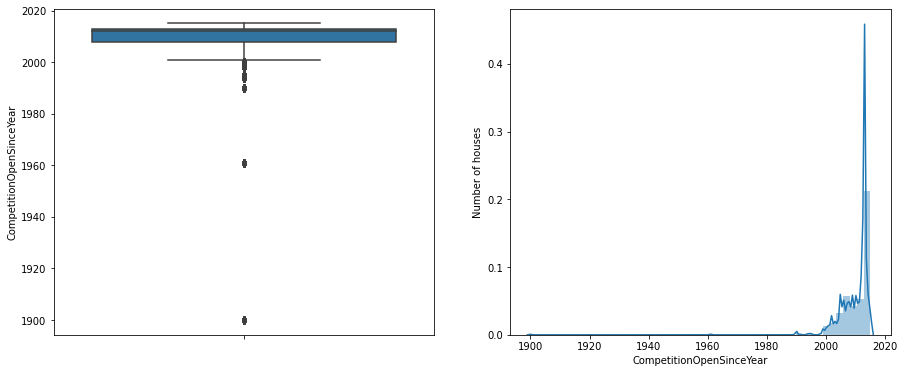

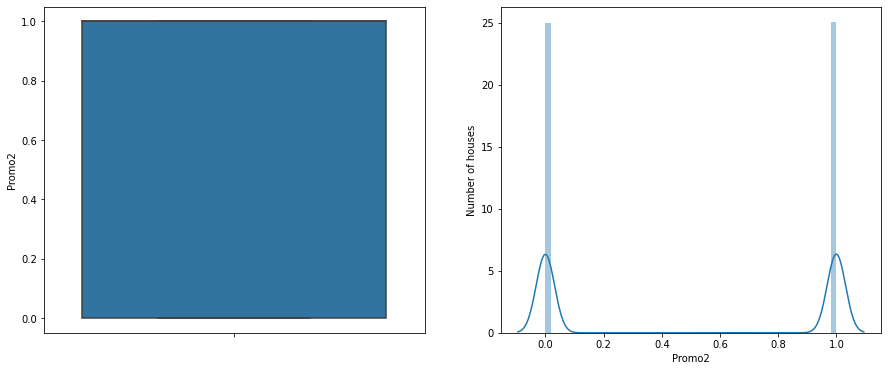

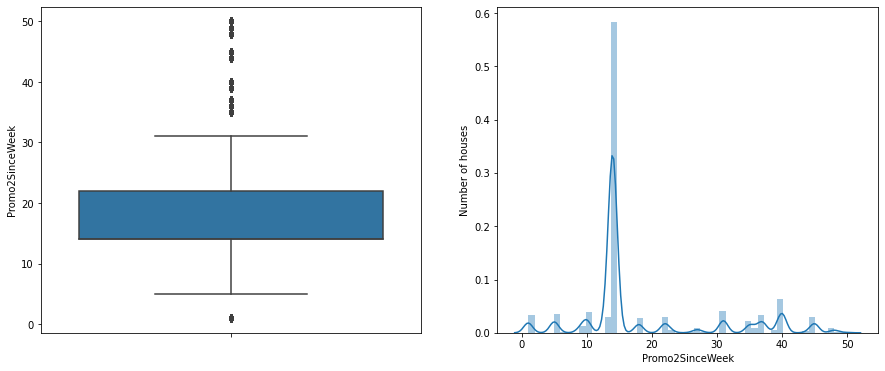

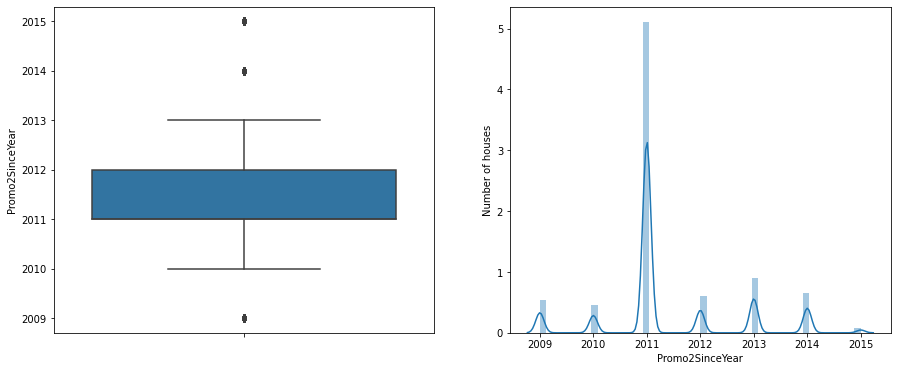

In [ ]:
# Checking Outliers of Numeric Discrete columns.

for var in numeric_disc_cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var])
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)
    plt.show()

* <i>There are very few Outliers in Numeric Discrete Features</i>

# <center><u>**03. Feature Engineering**</u></center>

## <u>**3.1: Encoding**</u>

In [ ]:
# Label Encoding of Assortment Column.

df['Assortment'] = df['Assortment'].map({'a':1,'b':2,'c':3}) # a = basic, b = extra, c = extended

In [ ]:
# Apply one hot encoding over all the nominal categorical features

df = pd.get_dummies(df,columns = ['PromoInterval','StoreType','StateHoliday'], drop_first = True) # By using get_dummies method
# drop_firt -  it is used to remove multicollinearity.

In [ ]:
# Checking the shape of dataframe. 

df.shape

(1017209, 23)

* <i>Now Total Records are 1017209, and 23 columns after performing the Encoding.<i/>

In [ ]:
# Displying the top five records of dataframe after doing encoding.

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Assortment,CompetitionDistance,...,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StoreType_b,StoreType_c,StoreType_d,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,1,1270.0,...,14.0,2011.0,1,0,0,1,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,1,1,1270.0,...,14.0,2011.0,1,0,0,1,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,1,1,1270.0,...,14.0,2011.0,1,0,0,1,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,1,1,1270.0,...,14.0,2011.0,1,0,0,1,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,1,1,1270.0,...,14.0,2011.0,1,0,0,1,0,0,0,0


## <u>**3.2: Feature Construction**</u>

In [ ]:
# Creating New feature from Existing One.

df['Day'] = df['Date'].dt.day # Extracting Day from Date column using day attribute.
df['Month'] = df['Date'].dt.month # Extracting Month from Date column using month attribute.
df['Year'] = df['Date'].dt.year # Extracting Year from Date column using year attribute.

In [ ]:
df.drop(columns='Date',inplace = True) # Dropping Date coulum beacause we made new features from Date column.

In [ ]:
# Displying top five records of updated dataframe.

df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,"PromoInterval_Mar,Jun,Sept,Dec",StoreType_b,StoreType_c,StoreType_d,StateHoliday_a,StateHoliday_b,StateHoliday_c,Day,Month,Year
0,1,5,5263,555,1,1,1,1,1270.0,9.0,...,0,0,1,0,0,0,0,31,7,2015
1,1,4,5020,546,1,1,1,1,1270.0,9.0,...,0,0,1,0,0,0,0,30,7,2015
2,1,3,4782,523,1,1,1,1,1270.0,9.0,...,0,0,1,0,0,0,0,29,7,2015
3,1,2,5011,560,1,1,1,1,1270.0,9.0,...,0,0,1,0,0,0,0,28,7,2015
4,1,1,6102,612,1,1,1,1,1270.0,9.0,...,0,0,1,0,0,0,0,27,7,2015


In [ ]:
# Displying Shape of updated df

df.shape

(1017209, 25)

## <u>**3.3: Removing multicollinearity**</u>

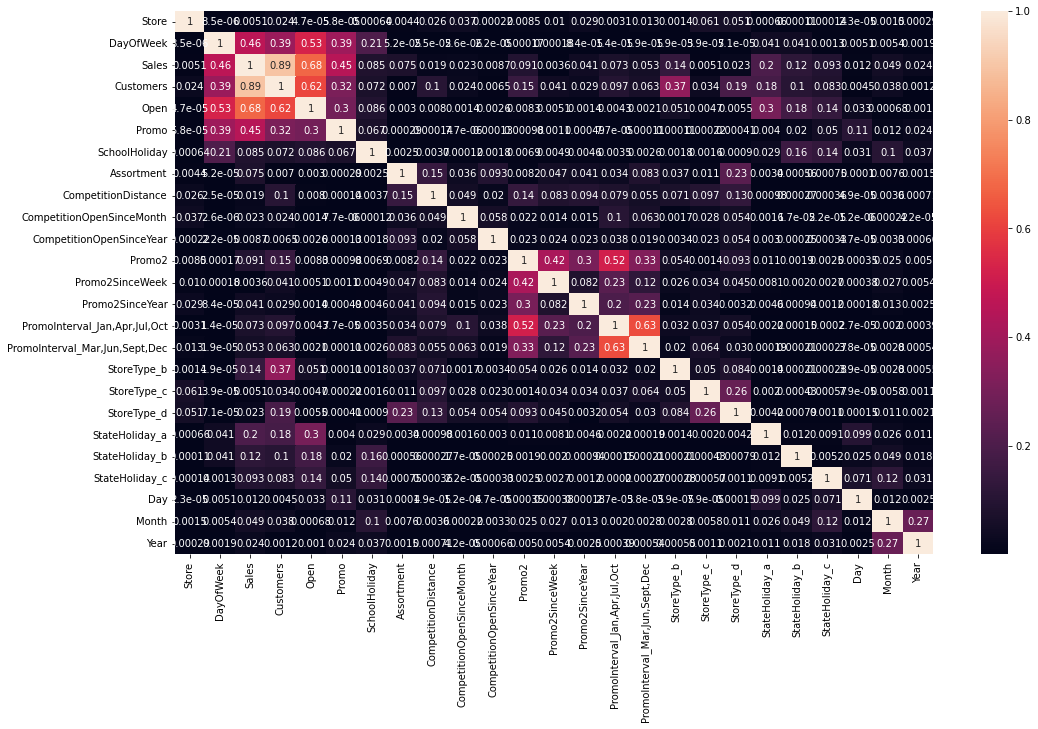

In [ ]:
# Ploting Correlation of all feauture using heatmap.

plt.figure(figsize = (17,10))
sns.heatmap(abs(df.corr()), annot = True);

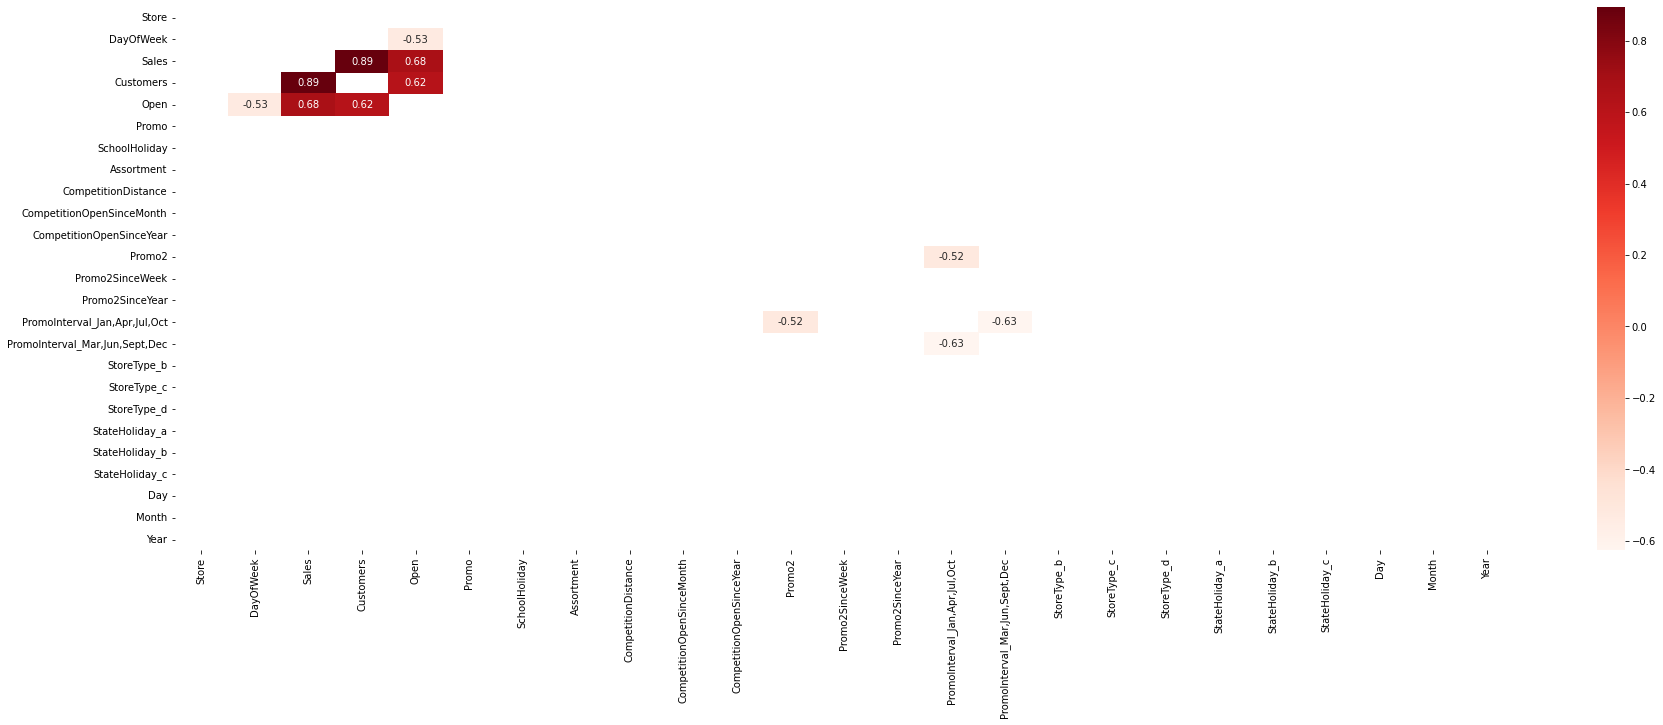

In [ ]:
# plotting the correlation of features which has euqul or greater than + 0.50 or -0.50

dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .50) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
# VIF variance-inflation-factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X): 
  """
  Description : Calculating the VIF score.
  Function_Name : calc_vif
  Arguments : Dataframe.
  Return_type : DataFrame.
  Created by : Mujtaba Ali and Prateek Sachdeva
  """
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)


In [ ]:
# Displying columns of dataframe

df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
# We are not considering 'Store','Customers','CompetitionDistance' 

calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Customers','CompetitionDistance']]])

,variables,VIF
0,DayOfWeek,8.622225e+00
1,Sales,7.496183e+00
2,Open,1.466119e+01
3,Promo,2.228408e+00
4,SchoolHoliday,1.347532e+00
5,Assortment,5.260631e+00
6,CompetitionOpenSinceMonth,9.028725e+00
7,CompetitionOpenSinceYear,1.416801e+05
8,Promo2,3.468423e+00
9,Promo2SinceWeek,4.953029e+00


In [ ]:
# We are droping feature one by one.
# First, We are droping Promo2SinceYear because of highest VIF value

calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Customers','CompetitionDistance','Promo2SinceYear']]])

,variables,VIF
0,DayOfWeek,8.621845
1,Sales,7.486774
2,Open,14.656075
3,Promo,2.228407
4,SchoolHoliday,1.347507
5,Assortment,5.258029
6,CompetitionOpenSinceMonth,9.028725
7,CompetitionOpenSinceYear,141246.890089
8,Promo2,3.215479
9,Promo2SinceWeek,4.760017


In [ ]:
# we are droping CompetitionOpenSinceYear	beacause of highest VIF value.
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Customers','CompetitionDistance','Promo2SinceYear','CompetitionOpenSinceYear']]])

,variables,VIF
0,DayOfWeek,8.621844
1,Sales,7.486625
2,Open,14.655892
3,Promo,2.228400
4,SchoolHoliday,1.347492
5,Assortment,5.225078
6,CompetitionOpenSinceMonth,9.008123
7,Promo2,3.210429
8,Promo2SinceWeek,4.759391
9,"PromoInterval_Jan,Apr,Jul,Oct",9.590432


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Store','Customers','CompetitionDistance','Promo2SinceYear','CompetitionOpenSinceYear','Year']]])

,variables,VIF
0,DayOfWeek,5.800470
1,Sales,7.485989
2,Open,11.568560
3,Promo,2.163582
4,SchoolHoliday,1.343274
5,Assortment,4.981021
6,CompetitionOpenSinceMonth,7.692162
7,Promo2,3.052751
8,Promo2SinceWeek,4.559152
9,"PromoInterval_Jan,Apr,Jul,Oct",7.446156


In [ ]:
# Droping  the features which had high VIF values.
df_ = df.copy()
df.drop(columns = ['Promo2SinceYear','CompetitionOpenSinceYear','Year'],inplace = True)

In [ ]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StoreType_b,StoreType_c,StoreType_d,StateHoliday_a,StateHoliday_b,StateHoliday_c,Day,Month
0,1,5,5263,555,1,1,1,1,1270.0,9.0,...,1,0,0,1,0,0,0,0,31,7
1,1,4,5020,546,1,1,1,1,1270.0,9.0,...,1,0,0,1,0,0,0,0,30,7
2,1,3,4782,523,1,1,1,1,1270.0,9.0,...,1,0,0,1,0,0,0,0,29,7
3,1,2,5011,560,1,1,1,1,1270.0,9.0,...,1,0,0,1,0,0,0,0,28,7
4,1,1,6102,612,1,1,1,1,1270.0,9.0,...,1,0,0,1,0,0,0,0,27,7


# <center><u>**04.Pre-Processing**</u></center>

## <u>**4.1: Feature Scaling**</u>


In [ ]:
 # Applying Column Transformation 
# Importing ColumnTransformer from compose module.

from sklearn.compose import ColumnTransformer

In [ ]:
# checking shape of dataframe.

df.shape

(1017209, 22)

In [ ]:
# Taking All Indepedent features in X and Dependent in y

X = df.drop(columns = "Sales")
y = df["Sales"]

#<u>**Train Test Split**</u>

In [ ]:
# importing.

from sklearn.model_selection import train_test_split # train_test_split from model_selection class
from sklearn.preprocessing import StandardScaler # StandardScaler of peprocessing class
from sklearn.preprocessing import RobustScaler # RobustScaler of perprocessing class.

In [ ]:
# Applying train_test_plit to split dataframe in train and test.
# Testing size is 20% of the whole dataframe.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) # it returns you X_train,X_test, y_train, and y_test

In [ ]:
# Checking the shape.

print("Size of X_train: ",X_train.shape)
print("Size of X_test : ",X_test.shape)
print("Size of y_train : ",y_train.shape)
print("Size of y_test : ",y_test.shape)

Size of X_train:  (813767, 21)
Size of X_test :  (203442, 21)
Size of y_train :  (813767,)
Size of y_test :  (203442,)


In [ ]:
# Converting numeric columns into list.

cols_ = list(df.describe().columns)

In [ ]:
# Removing 'Sales','Customers', and 'CompetitionDistance' columns from cols_ list.

[cols_.remove(col) for col in ['Sales','Customers','CompetitionDistance'] ]

[None, None, None]

In [ ]:
cols_

['Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'Day',
 'Month']

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',RobustScaler(),['CompetitionDistance','Customers']),
    ('tnf2',StandardScaler(),cols_),
],remainder='passthrough')

In [ ]:
# fit_transformation over X_train and Assigning it X_train_Scaled

X_train_Scaled = transformer.fit_transform(X_train)

In [ ]:
# transform X_test and Assign it into X_test_Scaled.

X_test_Scaled = transformer.transform(X_test)

In [ ]:
# Displying X_train_Scaled.

X_train_Scaled

array([[-0.08752026,  3.02777778,  0.43365943, ..., -0.06318579,
         0.48939742, -1.45733279],
       [-0.35332253,  3.37731481,  0.38397905, ..., -0.06318579,
        -1.55967223, -0.55506868],
       [-0.20097245,  0.11805556, -1.49456053, ..., -0.06318579,
        -1.67350943, -1.15657809],
       ...,
       [-0.06320908,  0.08796296, -0.24944587, ..., -0.06318579,
        -0.76281181,  1.24945955],
       [-0.34683955,  2.91666667, -0.69035929, ..., -0.06318579,
        -0.76281181,  1.55021425],
       [-0.31280389,  1.86805556,  1.62288366, ..., -0.06318579,
         1.40009504, -0.25431397]])

## <center><u>**05: Model Implementation**</u></center>

## 1. <u>Linear Regression</u>

In [ ]:
# Importing required libraries

from sklearn.linear_model import LinearRegression # LinearRegression of linear_mdoel class
from sklearn.metrics import accuracy_score # importing accuray score
from sklearn.metrics import r2_score # importing r2_score
from sklearn.metrics import mean_squared_error # importing mean_squired_error.

In [ ]:
lr = LinearRegression() # Creating object of LinearRegression, which is lr.
lr.fit(X_train_Scaled,y_train) # Training of Linear Regression

LinearRegression()

In [ ]:
# Finding Intercept of linear model using intercept_ attribute

lr.intercept_

5536.9062933057785

In [ ]:
# Checking the coefficient of linear model.

lr.coef_ 

array([ 125.54826281, 3123.00116679,  -36.50456958,  -98.96517365,
        324.20797805,  547.44529393,   11.93003971,  128.31904845,
        -30.25103432,   99.66579365,   82.50604155,   29.17801222,
        -42.11665015, -654.21475928,  -32.01942977,  427.29015142,
        -79.49570752,  -59.81179785,  -17.34008533,   10.08250472,
         71.28855858])

* *As we can see that second feature is contributing the more because it has highest coefficient value.*

In [ ]:
# Reseting the index using reset_index method of dataframe object.

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
# Predicting the Result of X_test_Scaled using linear model. and Assigning it into y_pred_lr

y_pred_lr = lr.predict(X_test_Scaled)

In [ ]:
# Accuray Score before Validation

print("Accuray Score at training data : ",lr.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",lr.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_lr))
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.8955253095474183
Accuracy score at testing data :  0.8951596497664747
R2 Score :  0.8951596497664747
Mean Squared Error :  1545491.6503600355
Root Mean Squared Error is :  1243.1780445133495


# <b> The Cross-Validation Procedure </b>

### In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.

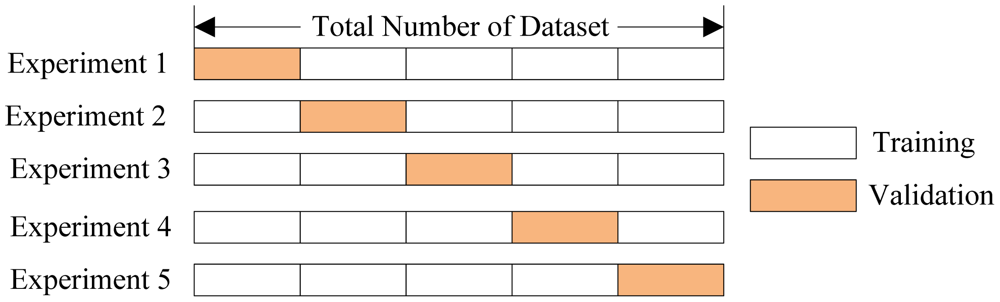


### We run an experiment called experiment 1 which uses the first fold as a holdout set, and everything else as training data. This gives us a measure of model quality based on a 20% holdout set, much as we got from using the simple train-test split. 

### We then run a second experiment, where we hold out data from the second fold (using everything except the 2nd fold for training the model.) This gives us a second estimate of model quality. We repeat this process, using every fold once as the holdout. Putting this together, 100% of the data is used as a holdout at some point.

### Returning to our example above from train-test split, if we have 5000 rows of data, we end up with a measure of model quality based on 5000 rows of holdout (even if we don't use all 5000 rows simultaneously.


In [ ]:
# Hyperparameter tunning for regression problem

from sklearn.model_selection import GridSearchCV

In [ ]:

parameters = {
    "fit_intercept" : [True,False],
    "positive" : [True,False]
}
lr = LinearRegression()
GridSearchCV_ = GridSearchCV(lr,param_grid = parameters,cv= 5)

In [ ]:
GridSearchCV_.fit(X_train_Scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [ ]:
GridSearchCV_.best_params_

{'fit_intercept': True, 'positive': False}

In [ ]:
# score after validation

print("Accuray Score at training data : ",GridSearchCV_.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",GridSearchCV_.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_lr))
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.8955253095474183
Accuracy score at testing data :  0.8951596497664747
R2 Score :  0.8951596497664747
Mean Squared Error :  1545491.6503600355
Root Mean Squared Error is :  1243.1780445133495


* *No Improvement in accuray is observed after cross-validation because we already have enough data to train.*

## <u>Regularization</u>

### <u>Ridge Regression</u>

In [ ]:
# Importing Ridge, and Lasso from linear model.

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
rig = Ridge() # creating rig object 
rig.fit(X_train_Scaled, y_train) # Training Ridge Regression

Ridge()

In [ ]:
y_pred_rig = rig.predict(X_test_Scaled) # prediction of X_test_Scaled using Ridge Regression

In [ ]:
# accuracy_score of Ridge Regression before validation.

print("Accuray Score at training data : ",rig.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",rig.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_rig))
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_rig))*((X_test_Scaled.shape[0]-1)/(X_test_Scaled.shape[0]-X_test_Scaled.shape[1]-1)))
mse = mean_squared_error(y_test, y_pred_rig)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.8955253095452929
Accuracy score at testing data :  0.8951596491169851
R2 Score :  0.8951596491169851
Adjusted R2 :  0.8951488259561919
Mean Squared Error :  1545491.6599344078
Root Mean Squared Error is :  1243.1780483641141


In [ ]:
# Hyperparameter Tunning for Ridge Regression

parameters = {
    'alpha':[0.1,0.2,0.5,1.0,1.2,1.5,2.0,2.5,3,4,5],
    'fit_intercept' : [True,False]
}
ridge = Ridge()
GridSCV_ridge = GridSearchCV(ridge,param_grid = parameters, cv = 5)

In [ ]:
GridSCV_ridge.fit(X_train_Scaled, y_train) # fitting the GridSearchCV 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1.0, 1.2, 1.5, 2.0, 2.5, 3, 4,
                                   5],
                         'fit_intercept': [True, False]})

In [ ]:
y_pred_rig_grid = GridSCV_ridge.predict(X_test_Scaled) # predicting the output of X_test_Scaled using  GridSCV_ridge

In [ ]:
# Scoring after hyperparameter tunning of Ridge regression

print("Accuray Score at training data : ",GridSCV_ridge.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",GridSCV_ridge.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_rig_grid))
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_rig_grid))*((X_test_Scaled.shape[0]-1)/(X_test_Scaled.shape[0]-X_test_Scaled.shape[1]-1)))
mse = mean_squared_error(y_test, y_pred_rig_grid)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.8955253094942867
Accuracy score at testing data :  0.8951596464766309
R2 Score :  0.8951596464766309
Adjusted R2 :  0.8951488233155652
Mean Squared Error :  1545491.6988568788
Root Mean Squared Error is :  1243.1780640185375


###<u>Lasso Regression</u>

In [ ]:
lasso = Lasso() # Creating object of Lasso
lasso.fit(X_train_Scaled, y_train) # training the Lasso Regression

Lasso()

In [ ]:
y_pred_lasso = lasso.predict(X_test_Scaled) # Predicting output of X_test_Scaled using lasso

In [ ]:
# Score of Lasso.
print("Accuray Score at training data : ",lasso.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",lasso.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_lasso))
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test_Scaled.shape[0]-1)/(X_test_Scaled.shape[0]-X_test_Scaled.shape[1]-1)))
mse = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.8955240041865958
Accuracy score at testing data :  0.895158656541069
R2 Score :  0.895158656541069
Adjusted R2 :  0.8951478332778076
Mean Squared Error :  1545506.291875138
Root Mean Squared Error is :  1243.1839332436443


In [ ]:
# Hyperparameter tunning of Lasso regression

parameters = {
    'alpha':[0.1,0.2,0.5,1.0,1.2,1.5,2.0,2.5,3,4,5],
    'fit_intercept' : [True,False]
}
lasso = Lasso()
GridSCV_lasso = GridSearchCV(lasso,param_grid = parameters, cv = 5)

In [ ]:
GridSCV_lasso.fit(X_train_Scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1.0, 1.2, 1.5, 2.0, 2.5, 3, 4,
                                   5],
                         'fit_intercept': [True, False]})

In [ ]:
y_pred_lasso_grid = GridSCV_lasso.predict(X_test_Scaled) # predicting output of X_test_Scaled using GridSCV_lasso

In [ ]:
# Score of LassoGridSearchCv after validation

print("Accuray Score at training data : ",GridSCV_lasso.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",GridSCV_lasso.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_lasso_grid))
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso_grid))*((X_test_Scaled.shape[0]-1)/(X_test_Scaled.shape[0]-X_test_Scaled.shape[1]-1)))
mse = mean_squared_error(y_test, y_pred_lasso_grid)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.8955252965290759
Accuracy score at testing data :  0.8951596686006692
R2 Score :  0.8951596686006692
Adjusted R2 :  0.8951488454418874
Mean Squared Error :  1545491.3727179794
Root Mean Squared Error is :  1243.1779328470961


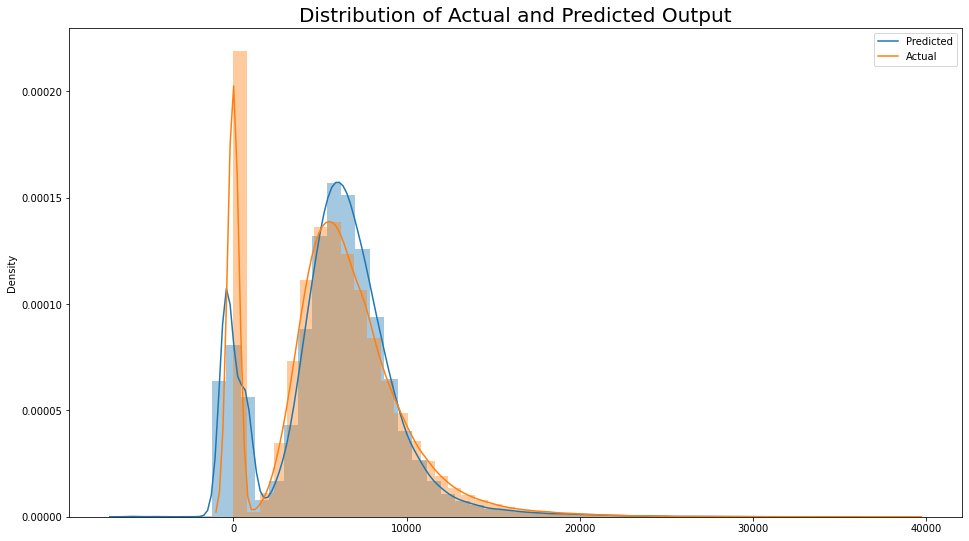

In [ ]:
# Visualization of Actual and predicted output using distplot

plt.figure(figsize=(16,9))
sns.distplot(y_pred_lasso_grid)
sns.distplot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.title("Distribution of Actual and Predicted Output",fontsize = 20)
plt.show()

## <u>Decision Tree Regressor</u>

In [ ]:
# applying DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor from tree class of sklearn

In [ ]:
dtree = DecisionTreeRegressor() # Creating object of DecisionTreeRegressor
dtree.fit(X_train_Scaled, y_train) # Training the DecisionTreeRegressor model

DecisionTreeRegressor()

In [ ]:
y_pred_dtree = dtree.predict(X_test_Scaled) # Predicting the output of X_test_Scaled using dtree object

In [ ]:
# finding score of decision tree regressor.

print("Accuray Score at training data : ",dtree.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",dtree.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_dtree))
mse = mean_squared_error(y_test, y_pred_dtree)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  1.0
Accuracy score at testing data :  0.9717114405156861
R2 Score :  0.9717114405156861
Mean Squared Error :  417012.4611977861
Root Mean Squared Error is :  645.7650201100909


In [ ]:
y_test[0] # Actual Result

3598

In [ ]:
dtree.predict([X_test_Scaled[0]]) # Output is 3383

array([3383.])

In [ ]:
3383/3598 # almost 94% accurate. 

0.9402445803224013

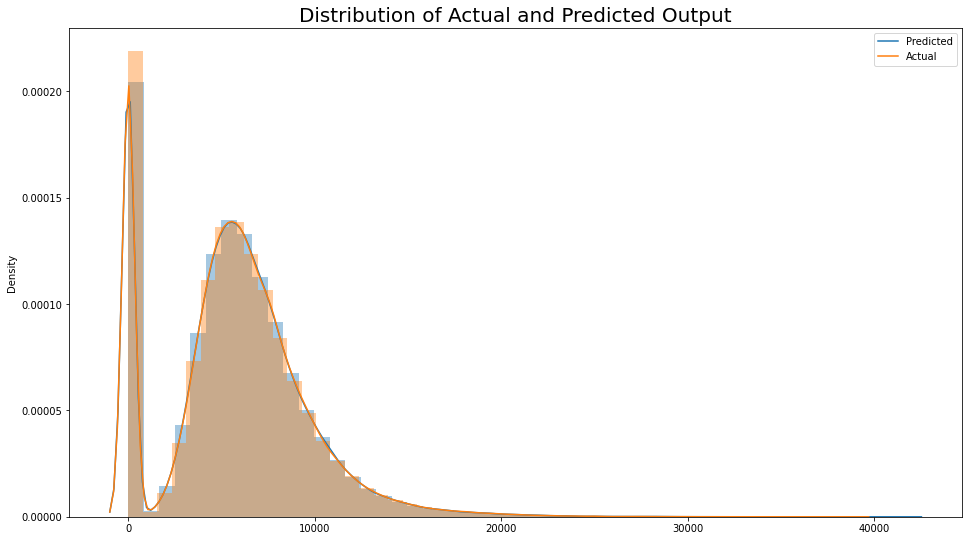

In [ ]:
# Visualization of Actual and predicted Output using DecisonTreeRegressor

plt.figure(figsize=(16,9))
sns.distplot(y_pred_dtree)
sns.distplot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.title("Distribution of Actual and Predicted Output",fontsize = 20)
plt.show()

## <u>Random Forest</u>

In [ ]:
# Importing RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Creating object of RandomForestRegressor. it is an Ensemble learning algorithm.

randomfrst = RandomForestRegressor(n_estimators = 100,criterion = "squared_error")

In [ ]:
randomfrst.fit(X_train_Scaled, y_train) # Training the RandomForestRegressor

RandomForestRegressor()

In [ ]:
y_pred_randomfrst = randomfrst.predict(X_test_Scaled) # predicting the output of X_test_Scaled by using random forest

In [ ]:
# accuracy_score of random foreset regressor

print("Accuray Score at training data : ",randomfrst.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",randomfrst.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_randomfrst))
mse = mean_squared_error(y_test, y_pred_randomfrst)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.9980065641051742
Accuracy score at testing data :  0.9858123675035616
R2 Score :  0.9858123675035616
Mean Squared Error :  209145.31010990997
Root Mean Squared Error is :  457.3240755852571


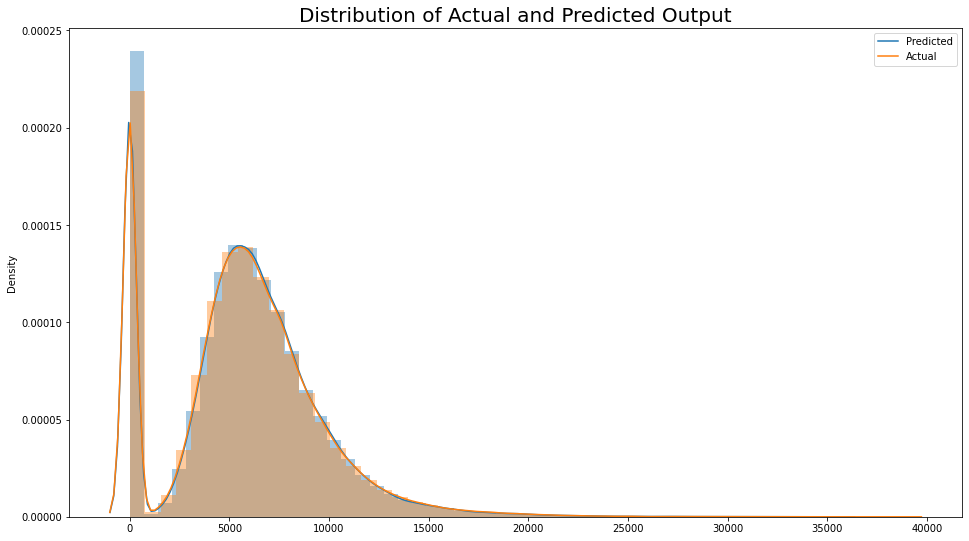

In [ ]:
# Visualization of Actual and predicted Output using RandomForest

plt.figure(figsize=(16,9))
sns.distplot(y_pred_randomfrst)
sns.distplot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.title("Distribution of Actual and Predicted Output",fontsize = 20)
plt.show()

In [ ]:
# Hyperparameter tunning of RandomForest

randomfrst = RandomForestRegressor()
grid_values = {'n_estimators':[50, 80,  100], 
               'max_depth':[3, 5, 7],
               'criterion' : ["squared_error", "absolute_error", "poisson"],
               'ccp_alpha' : [0.001,0.1,0.2,0.3]
               }
randomfrst_grid = GridSearchCV(randomfrst, param_grid = grid_values, scoring = 'r2', cv=5)

In [ ]:
randomfrst_grid.fit(X_train_Scaled, y_train)

In [ ]:
y_pred_randomfrst_grid = randomfrst_grid.predict(X_test_Scaled) # predicting the output of X_test_Scaled using randomfoest_grid

In [ ]:
# accuracy_score of random forest after cross validation

print("Accuray Score at training data : ",randomfrst_grid.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",randomfrst_grid.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_randomfrst_grid))
mse = mean_squared_error(y_test, y_pred_randomfrst_grid)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

## <u>XGBRegressor</u>

In [ ]:
## XGboost 
# from sklearn.ensemble import XGboost
from xgboost import XGBRegressor

In [ ]:
Xgboost = XGBRegressor() # Creating XGBRegressor object
Xgboost.fit(X_train_Scaled, y_train) # Training the XGBRegressor

[04:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred_xgboost = Xgboost.predict(X_test_Scaled) # Predicting the output of X_test_Scaled using xgboost model

In [ ]:
# Accuracy of XGBRegressor 

print("Accuray Score at training data : ",Xgboost.score(X_train_Scaled, y_train))
print("Accuracy score at testing data : ",Xgboost.score(X_test_Scaled, y_test))
print("R2 Score : ",r2_score(y_test, y_pred_xgboost))
mse = mean_squared_error(y_test, y_pred_xgboost)
print("Mean Squared Error : ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ",rmse)

Accuray Score at training data :  0.9392046647415322
Accuracy score at testing data :  0.9381481716590879
R2 Score :  0.9381481716590879
Mean Squared Error :  911781.4281186373
Root Mean Squared Error is :  954.8724669392438


In [ ]:

# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# model_ = xgboost.XGBRegressor()
kfold = KFold(n_splits=5)
results = cross_val_score(Xgboost, X_train_Scaled, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[04:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## <u>Best performing algorithm and its results</u>

### <i> As we can see that We applied Lienar Regression, its regularization, Decision Tree, its Ensembles i.e Random Forest, and XGBoostRegressor.</i>
### <i>We found the best accuray of around 98% (testing accuracy) through Random Forest which is an ensemble of Decision Tree.</i>


# <center><u>**6: Model Explainability**</u></center>

**Model Explainability:**

* Explainability in machine learning means that you can explain what happens in your model from input to output. It makes models transparent and solves the black box problem. Explainability is the degree to which a human can understand the cause of a decision or the degree to which a human can consistently predict ML model results. Explainability and interpretability are often used interchangeably. Although they have the same goal to understand the model.

### <u>**Why is Explainability important?**</u>

Machine Learning gets a bad reputation when it negatively impacts business profits. This often happens because of the disconnection between the data science team and the business team.

Explainability connects the data science team and non-technical team, improving knowledge exchange, and giving all stakeholders a better understanding of product requirements and limitations. All of this promotes better governance.

But there are at least five more reasons why ML Explainability is important:

<u>**Accountability:**</u>

When a model makes a wrong or rogue decision, knowing the factors that caused that decision, or who is responsible for that failure, is necessary to avoid similar problems in the future. With model explanation, data science teams can give organizations more control over their ML models.

<u>**Trust:**</u>

In high-risk domains (like healthcare or finance), trust is critical. Before ML solutions can be used and trusted, all stakeholders must fully understand what the model does. If you claim that your model makes better decisions and notices patterns that humans don’t see, you need to be able to back it up with evidence. Domain experts will be naturally skeptical towards any technology that claims to see more than them.

<u>**Compliance:**</u>

Model explainability is critical for data scientists, auditors, and business decision-makers alike to ensure compliance with company policies, industry standards, and government regulations.

<u>**Performance:**</u>

Explainability can also improve performance. If you understand why and how your model works, you know exactly what to fine-tune and optimize.

<u>**Enhanced control:**</u>

Understanding the decision-making process of your models shows you unknown vulnerabilities and flaws. With these insights, control is easy. The ability to rapidly identify and correct mistakes in low-risk situations adds up, especially when applied across all models in production.

# <u>**Model Explainability Using SHAP (SHapley Additive exPlanations)**</u>


SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

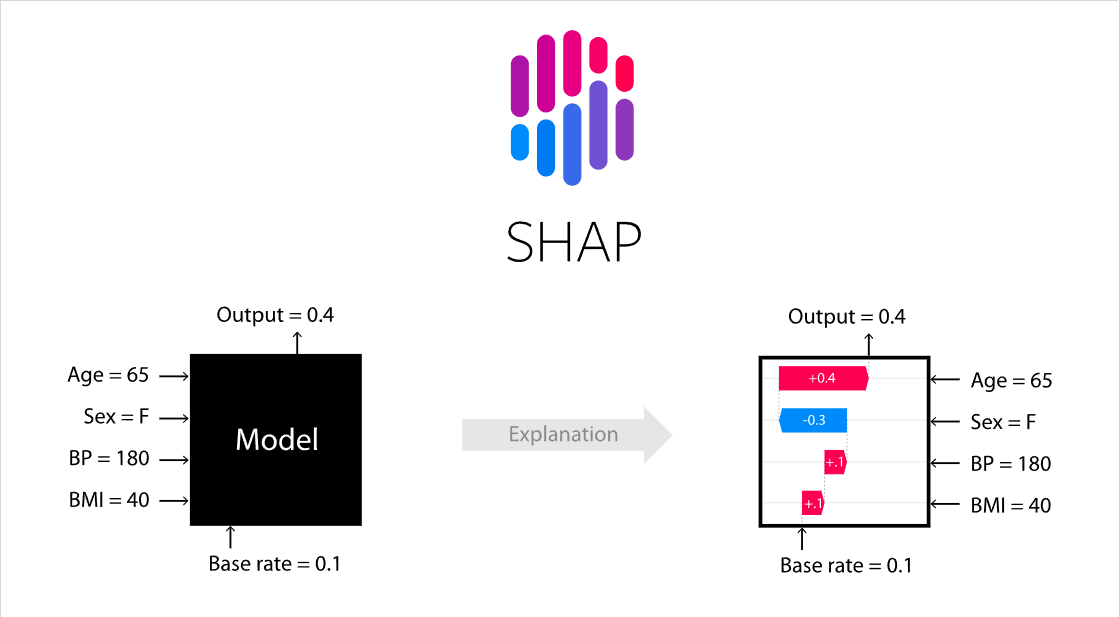

In [ ]:
pip install shap # importing shape library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.9 MB/s 


In [ ]:
# model explainabillty of XGboost Regressor
import shap

In [ ]:
explainer = shap.Explainer(Xgboost)
shap_values = explainer(X)

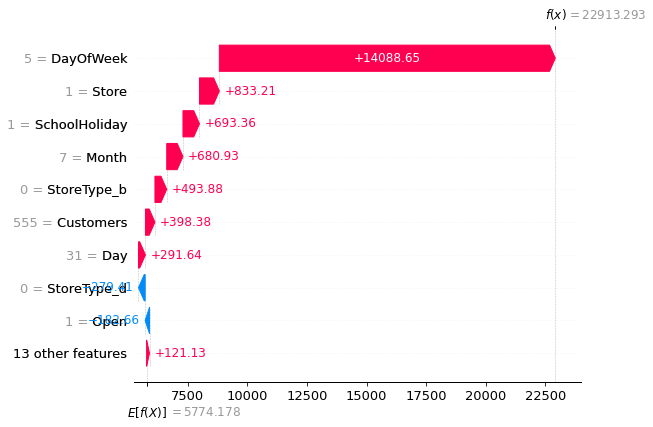

In [ ]:
# visualize the first record's prediction explanation

shap.plots.waterfall(shap_values[0])

* *AS we can see that DayOfWeek is contributing the more*

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Another way to visualize the same explanation is to use a force plot (these are introduced in our Nature BME paper):

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.

In [ ]:
# summarize the effects of all the features

shap.plots.beeswarm(shap_values)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

In [ ]:
# Showing the mean weightage/Importance of all features of dataset using barplot.

shap.plots.bar(shap_values)

# <center><u>**Summary**</u></center>

1.   <i>First of all we dealt with the dataset by performing EDA. We imputed the missing values, visualized and analysed the relationships, detected the outliers. Then we moved on to feature engineering, encoded the features, constructed the features, removed the multicollinearity using VIF. </i>

2. <i>In pre-processing, we scaled the features using Standard Scaler and Robust Scaler(To handle Outliers). Then we split the data into training and testing sets with the ratio of 80:20 respectively.</i>

3. <i> Then we applied Linear regression where we got predictions with 89% accuracy(over testing data). Then we used Regularization techniques. In ridge & lasso regression, we predicted outcome with 89% accuracy as well.</i>

4.  <i>After that we used Tree based algorithms. With decision tree, we got prediction with 97.17% accuracy(Excellent Enough). Then we used ensembles of Decision trees. With Random foreset, we predicted outcome with 98.58% accuracy(<u>**Great,istn't it!**</u>). With Xgboost we predicted outcome with 93% accuracy. Then we explained the models using SHAP, where we found <u>**DayOfWeek**</u> to be the most important contributing feature. </i>

5. <i> So, we can conclude that we have predicted the target variable with the best accuracy of **98%** using <u>**Random Forest**</u>.</i>


